## House Price Predictions - EDA

## Importing required libraries

In [14]:
# Let's import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing dataset

In [17]:
df = pd.read_csv(r"E:\Study\Projects\EDA\KirshNaik\train.csv")
pd.set_option('display.max_columns', None)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [21]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

## Missing Values

In [9]:
nan_variables = [features for features in df.columns if df[features].isnull().sum() > 1]
for feature in nan_variables:
    print(feature, np.round(df[feature].isnull().mean(), 4), '% of missing values')

LotFrontage 0.1774 % of missing values
Alley 0.9377 % of missing values
MasVnrType 0.5973 % of missing values
MasVnrArea 0.0055 % of missing values
BsmtQual 0.0253 % of missing values
BsmtCond 0.0253 % of missing values
BsmtExposure 0.026 % of missing values
BsmtFinType1 0.0253 % of missing values
BsmtFinType2 0.026 % of missing values
FireplaceQu 0.4726 % of missing values
GarageType 0.0555 % of missing values
GarageYrBlt 0.0555 % of missing values
GarageFinish 0.0555 % of missing values
GarageQual 0.0555 % of missing values
GarageCond 0.0555 % of missing values
PoolQC 0.9952 % of missing values
Fence 0.8075 % of missing values
MiscFeature 0.963 % of missing values


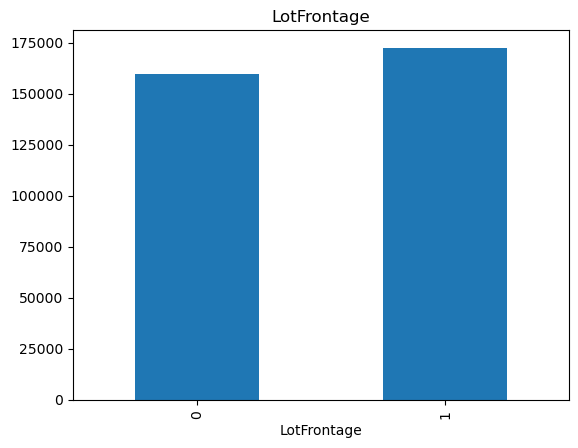

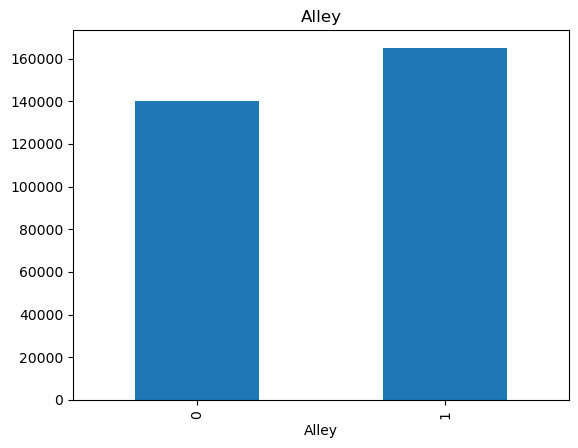

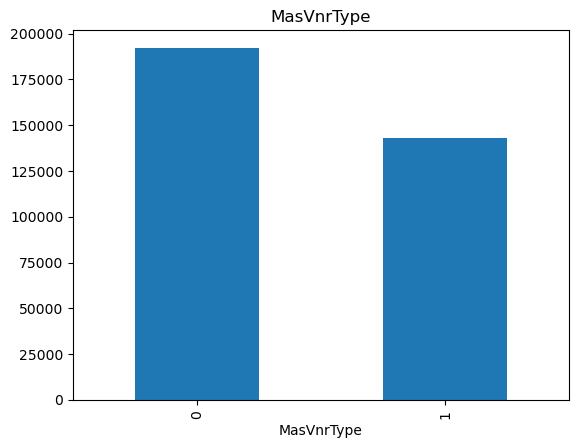

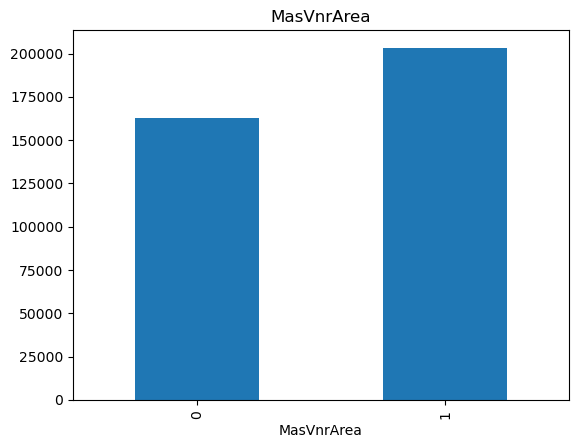

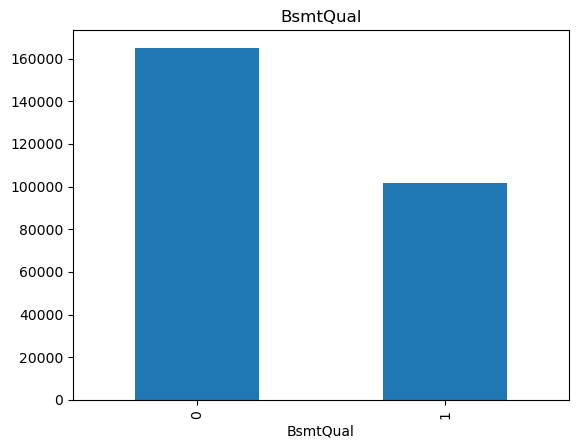

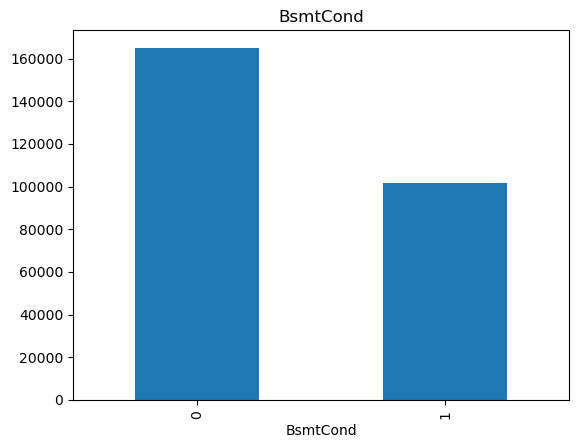

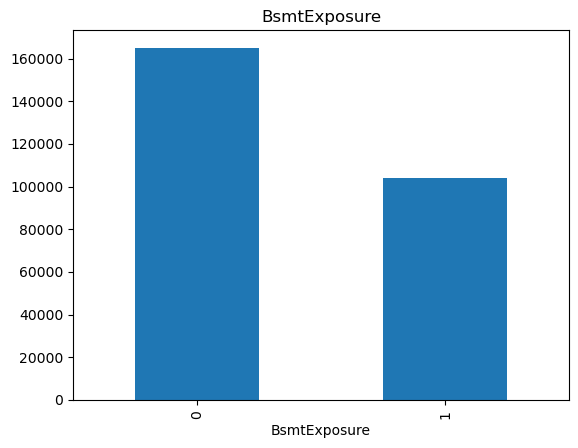

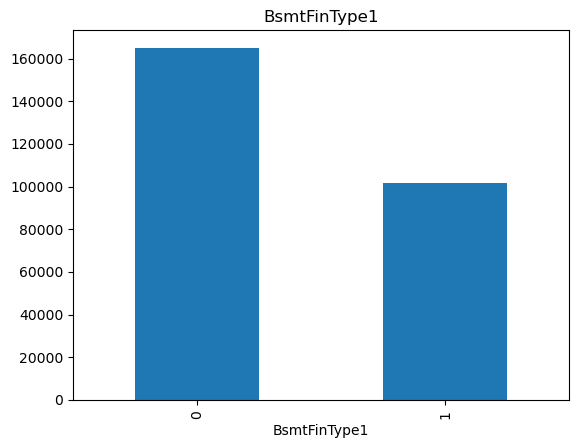

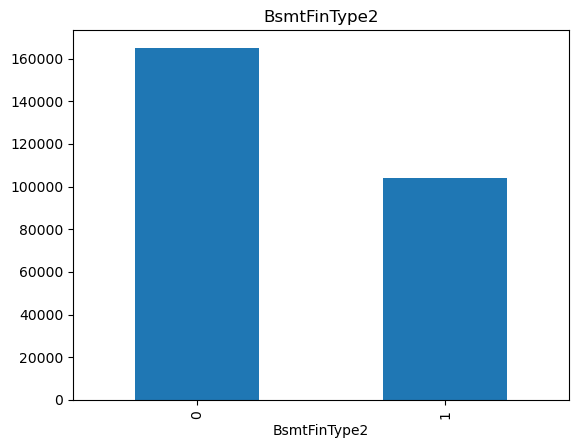

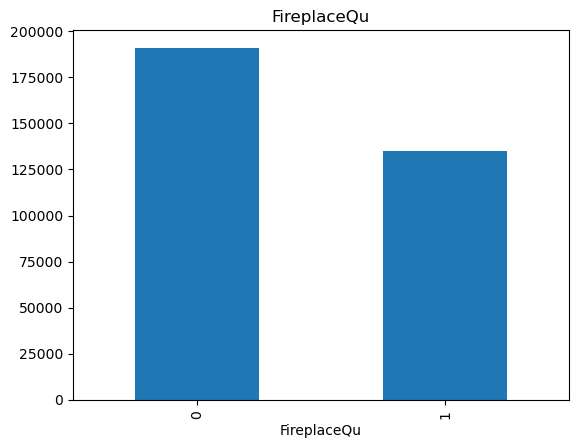

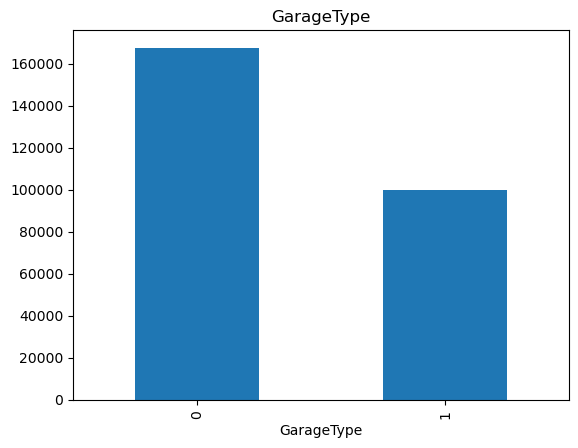

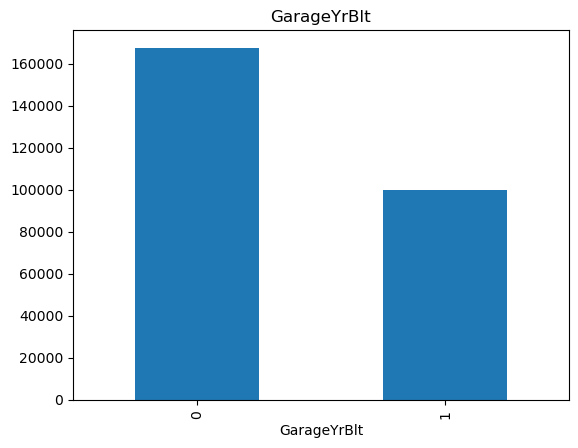

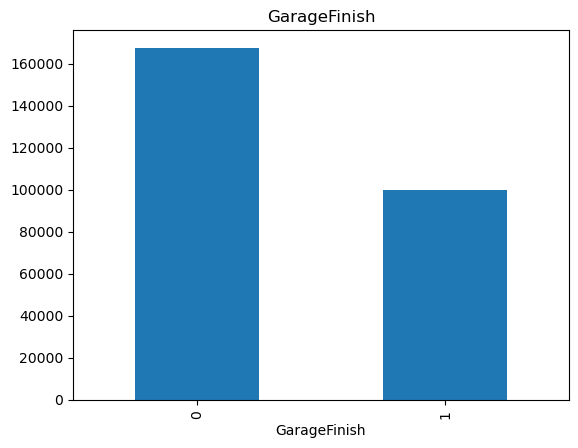

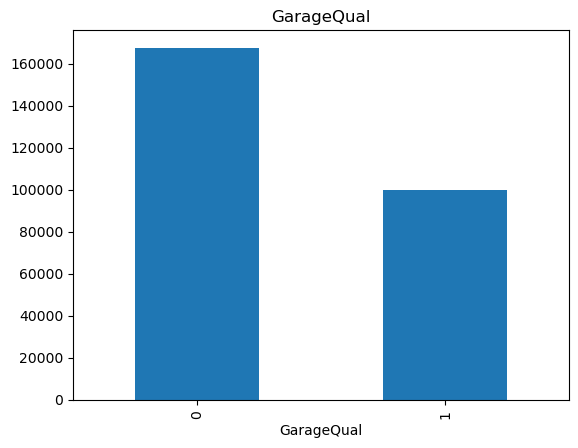

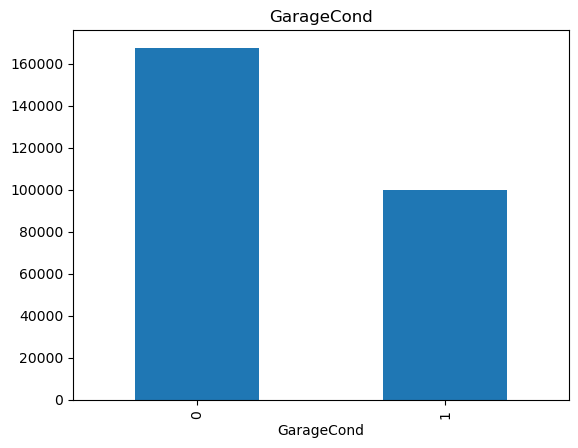

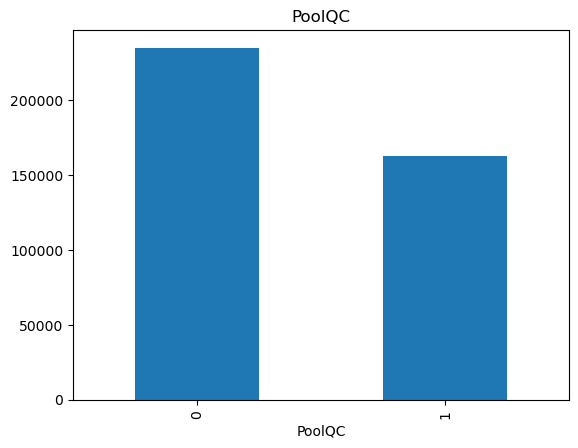

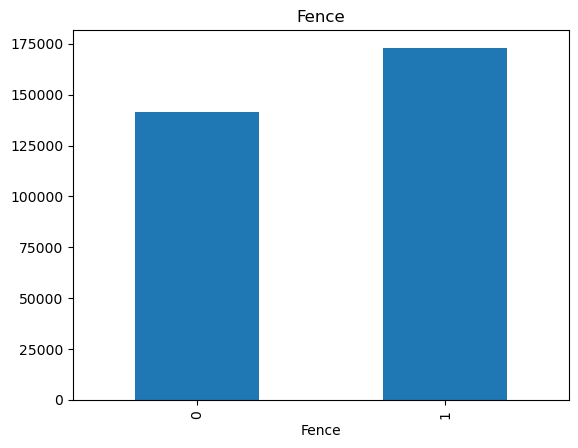

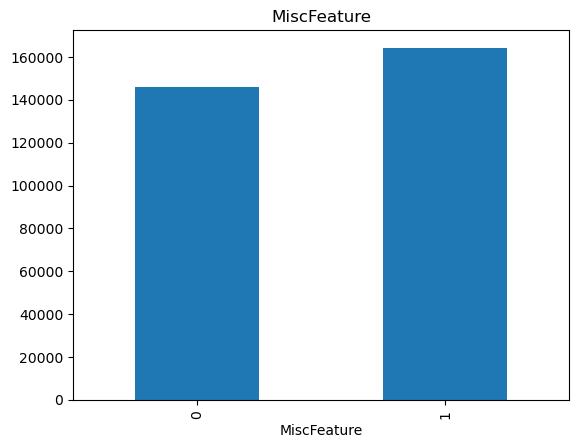

In [10]:
# Since we have very large no. of missing values, we see the relationship between all missing features & SalePrice variable
# We set 1 for all feature that has missing values and 0 otherwise
# If you see the plot, interestingly, the sale price of some of missing value features are high.
for feature in nan_variables:
    data = df.copy()
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    data.groupby(feature)['SalePrice'].median().plot(kind='bar')
    plt.title(feature)
    plt.show()

## Numerical Variables

In [12]:
numerical_variables = [features for features in df.columns if df[features].dtype!='O']
f'No. of numerical variables: {len(numerical_variables)}'

'No. of numerical variables: 38'

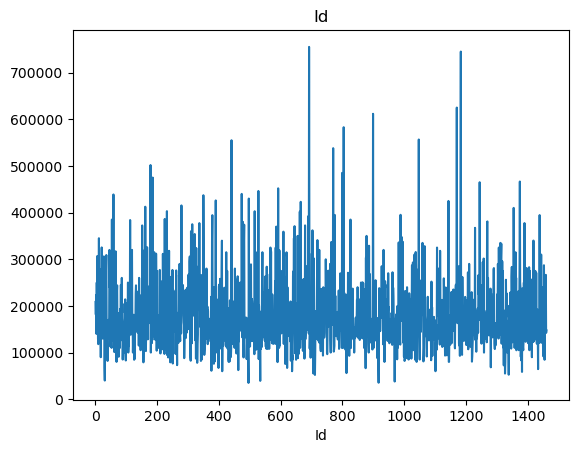

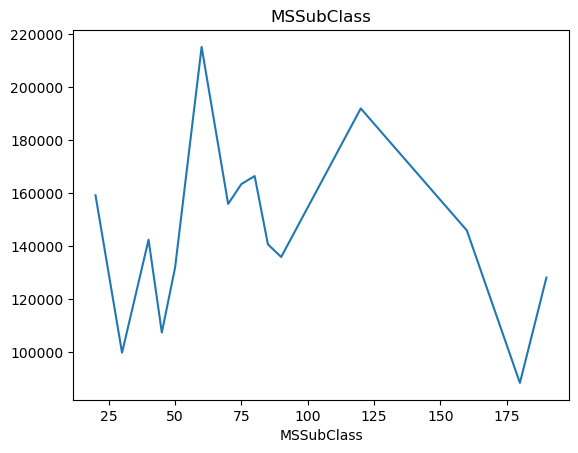

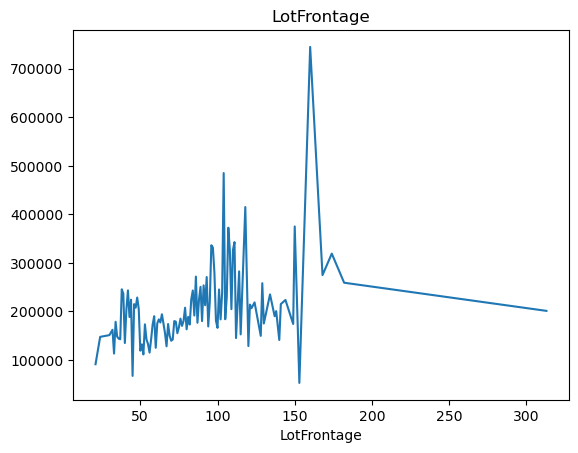

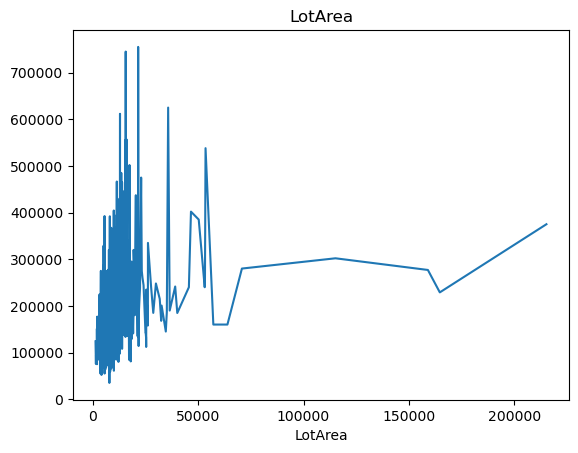

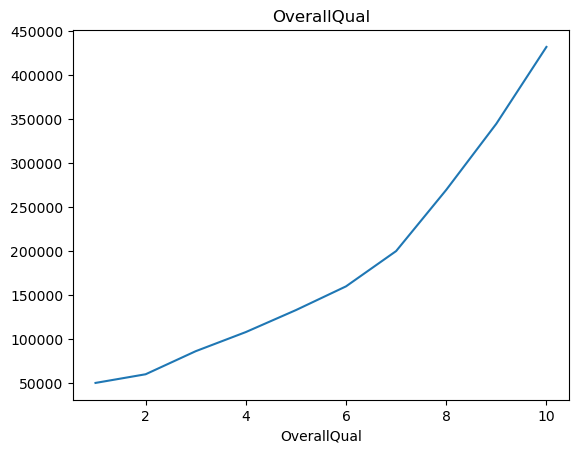

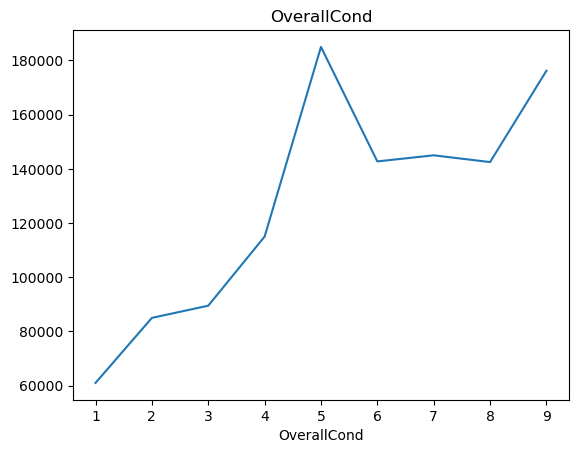

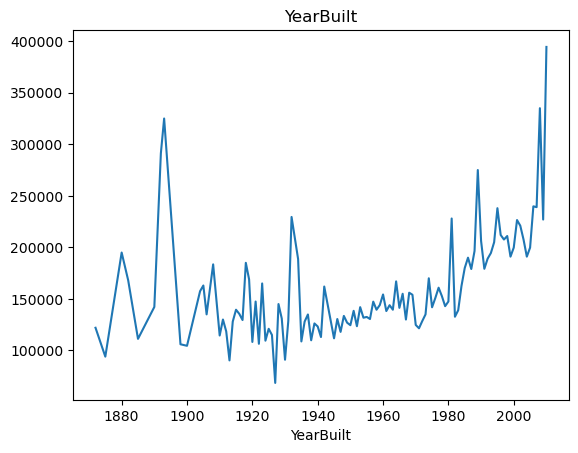

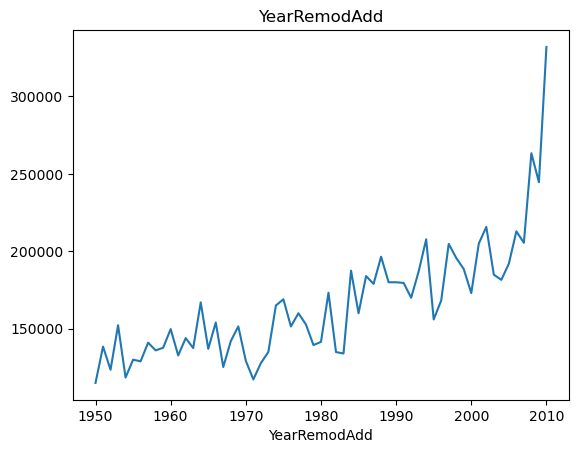

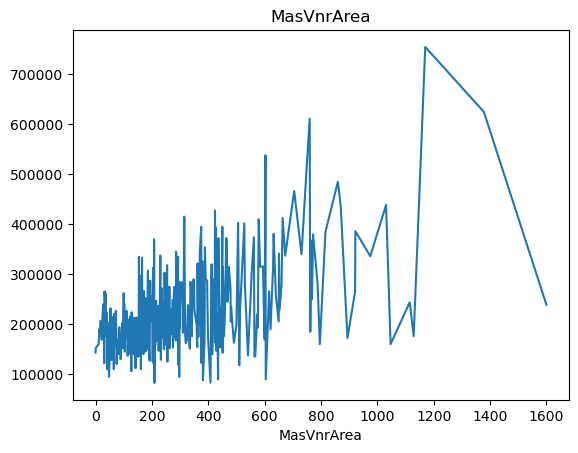

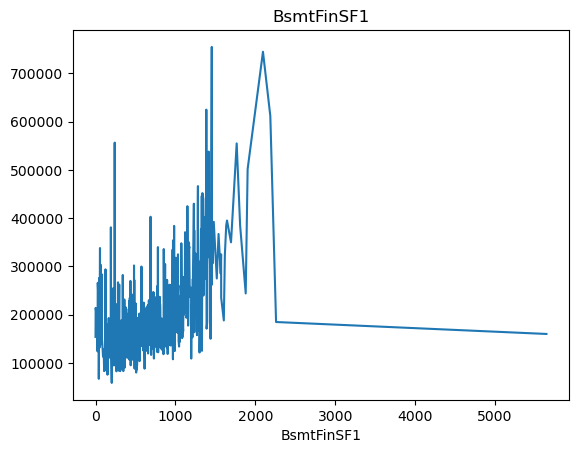

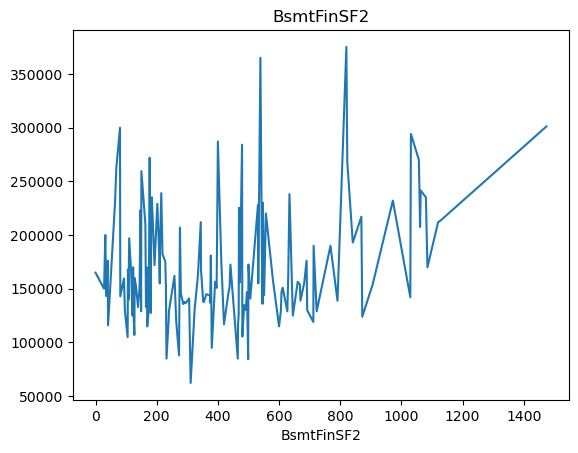

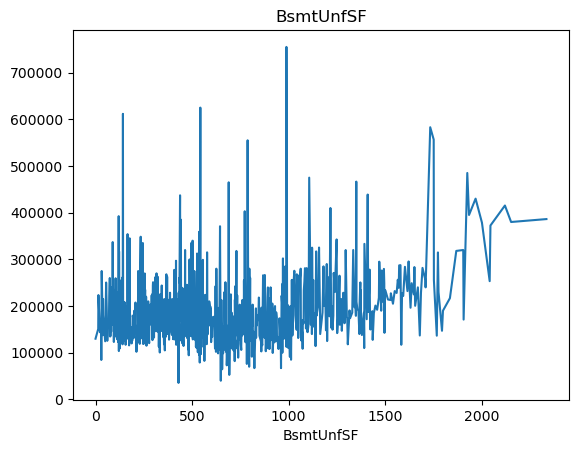

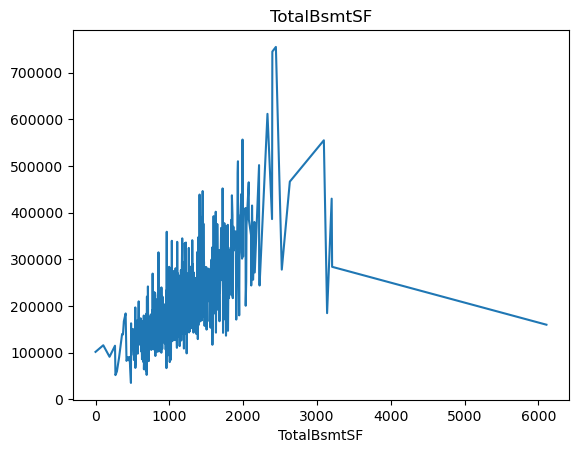

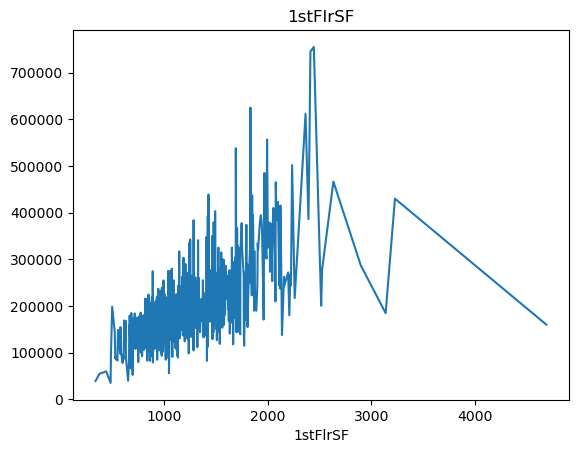

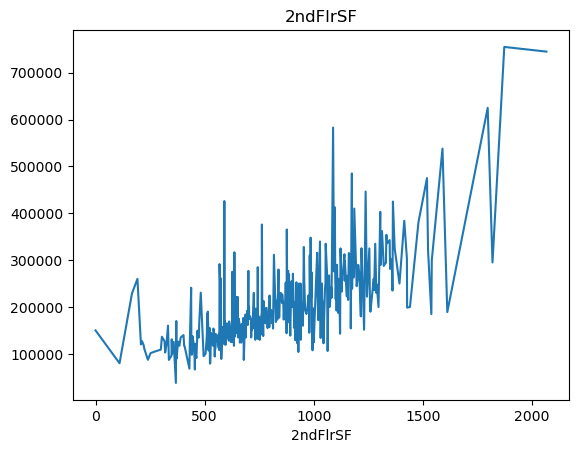

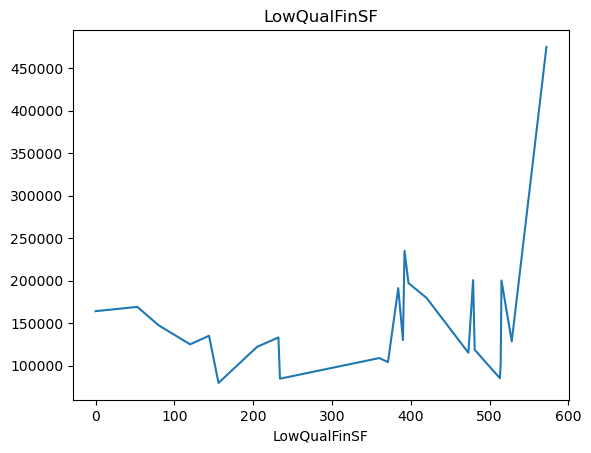

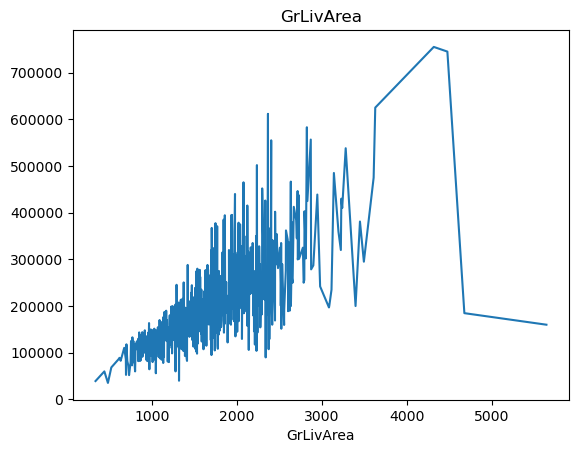

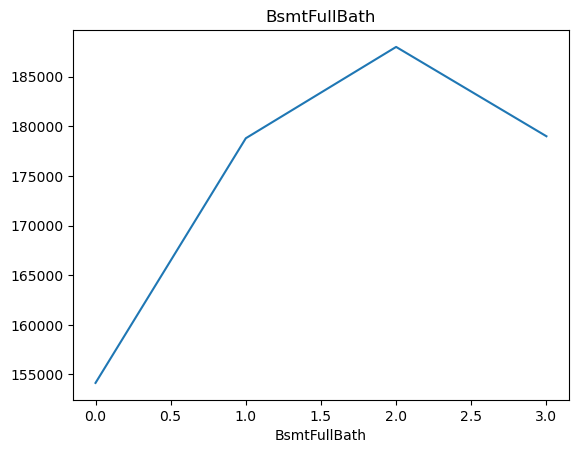

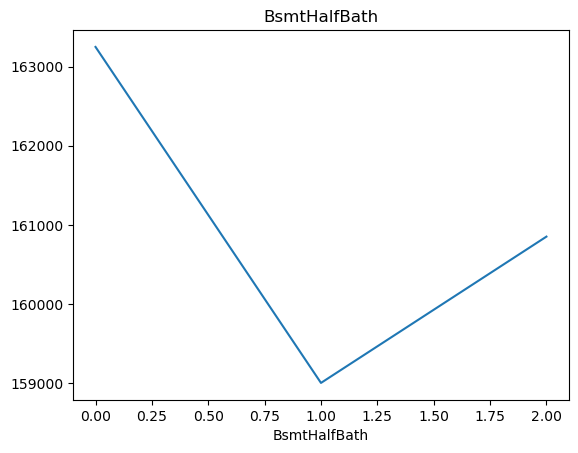

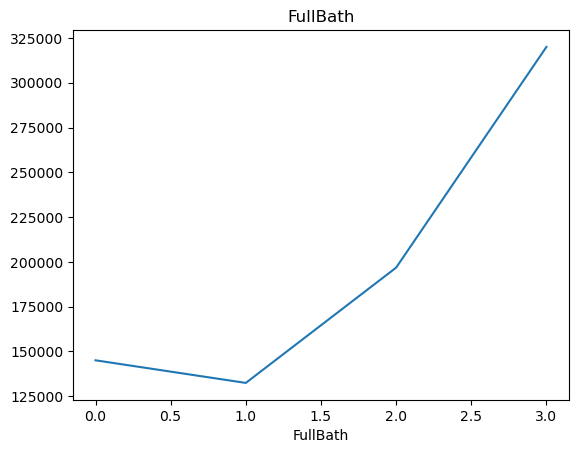

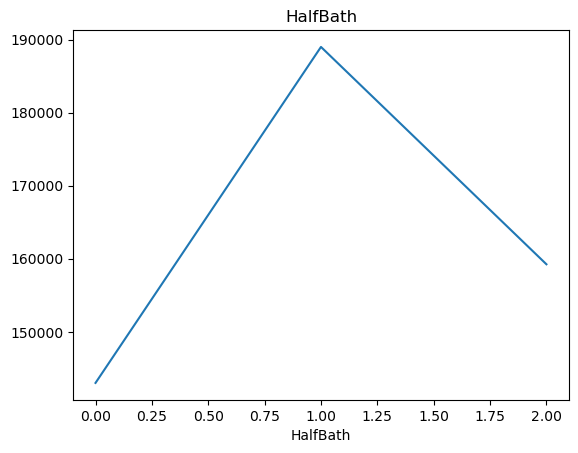

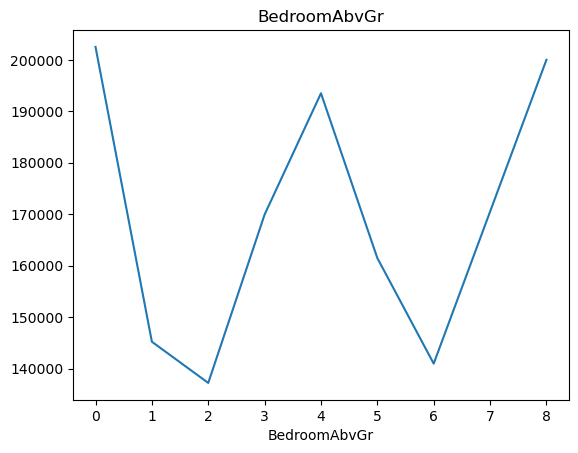

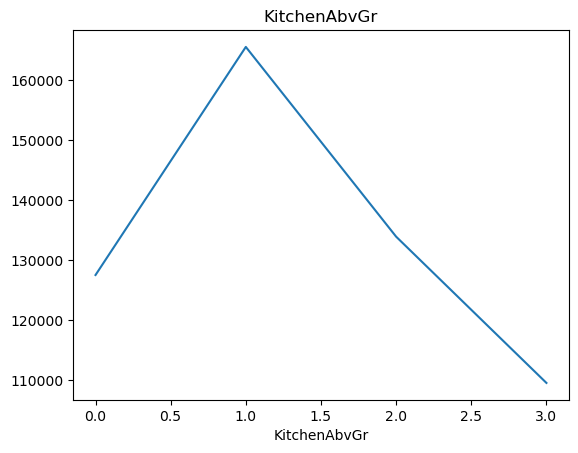

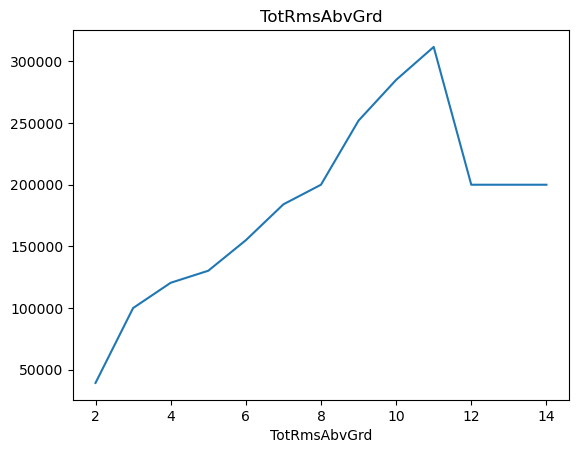

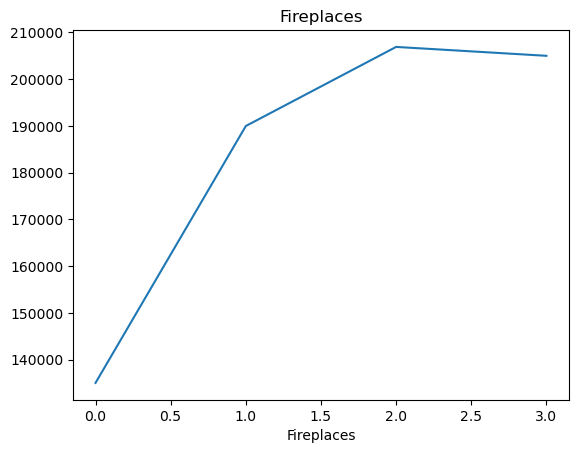

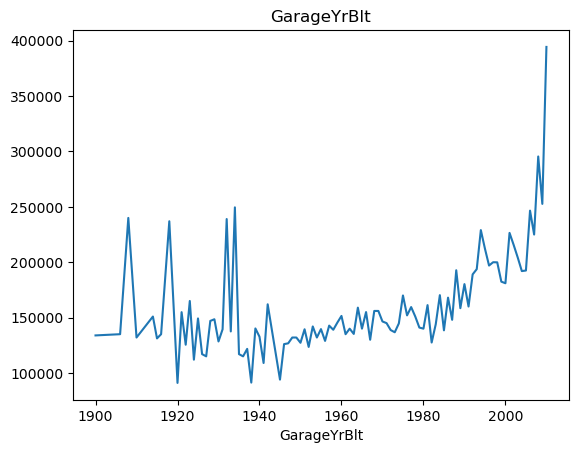

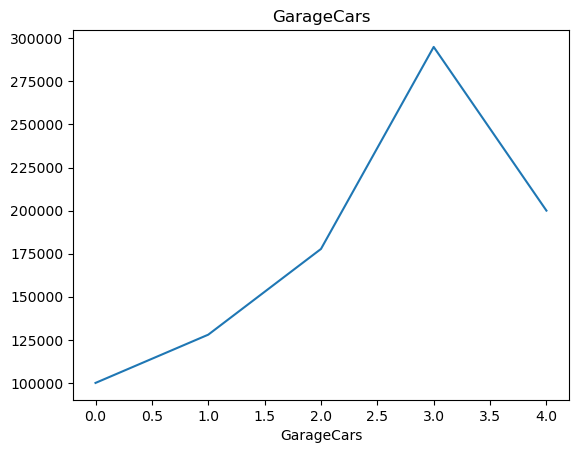

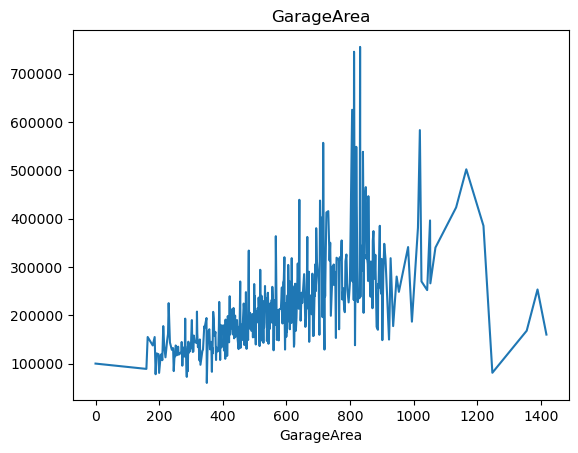

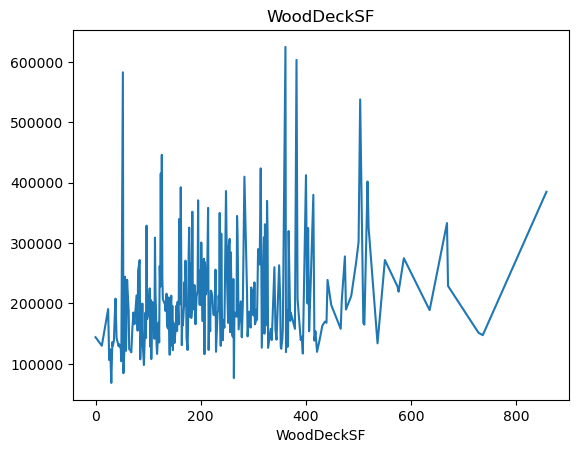

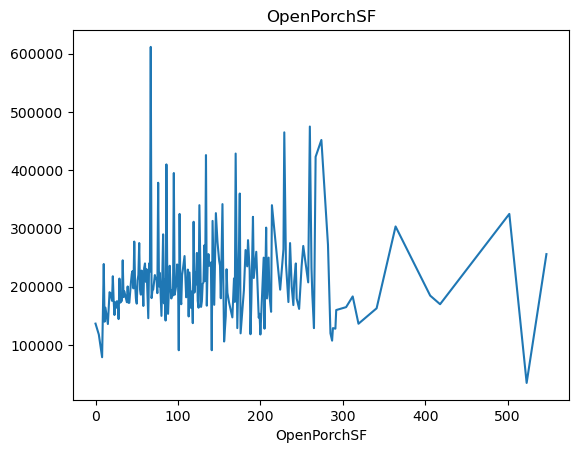

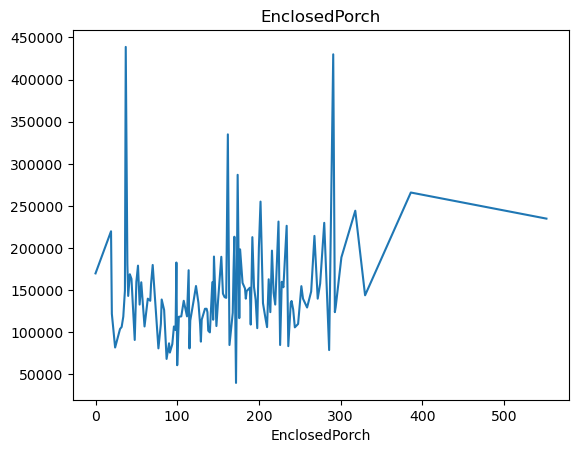

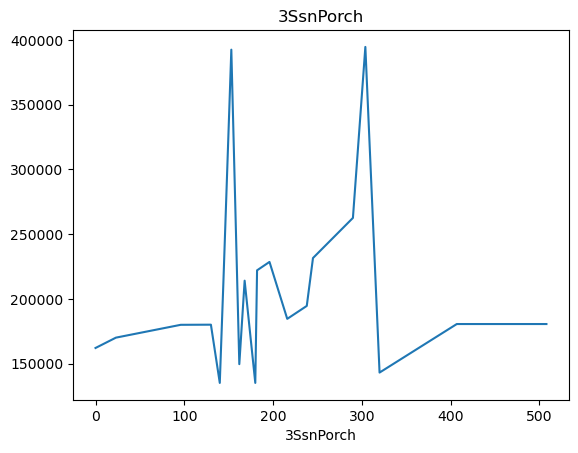

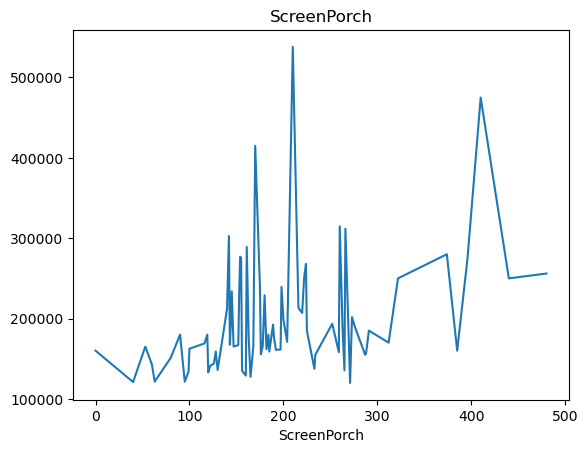

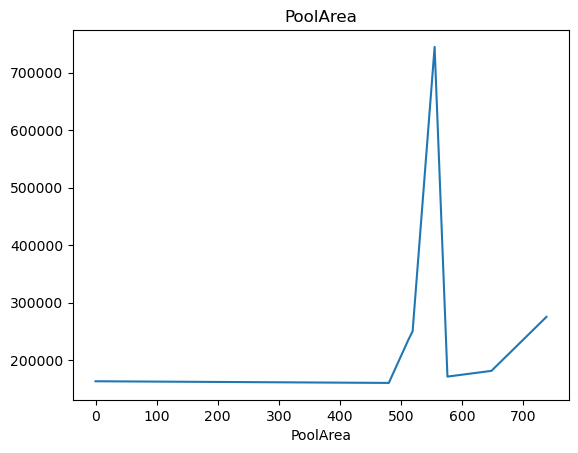

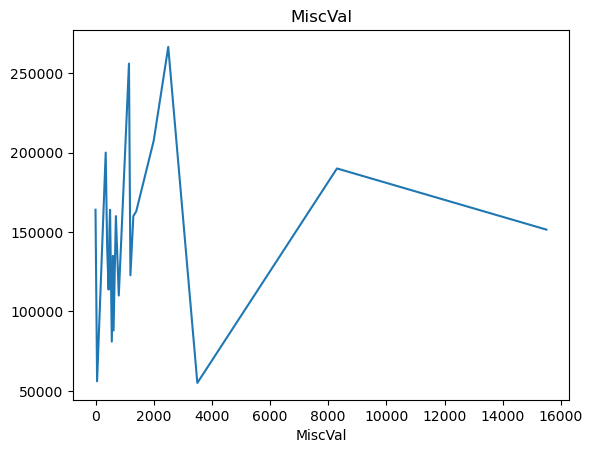

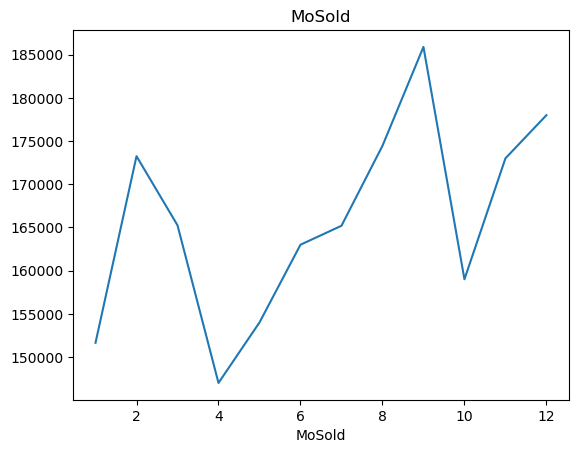

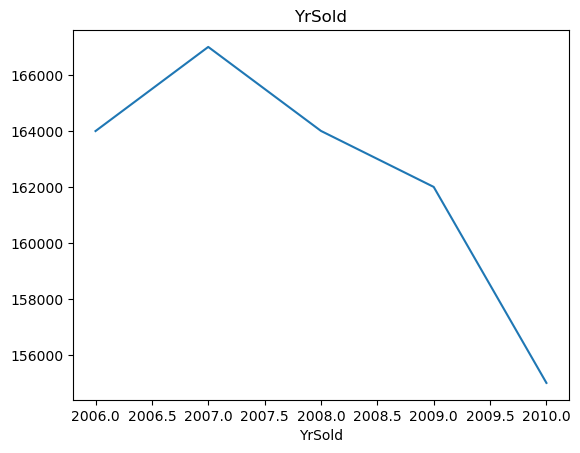

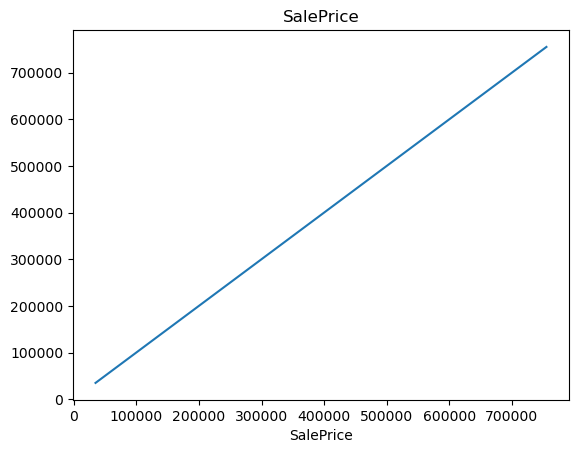

In [13]:
for feature in numerical_variables:
    data = df.copy()
    data.groupby(feature)['SalePrice'].median().plot()
    plt.title(feature)
    plt.show()

## Temporal variables - datatime variables

In [15]:
# Temporal variables are variables that are associated with date time data types or years.
year_feature = [feature for feature in numerical_variables if 'Year' in feature or 'Yr' in feature]
year_feature
    

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [16]:
# Listing all the unique values (without duplicates) of all year_feature variable. 
for feature in year_feature:
    print(feature, df[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

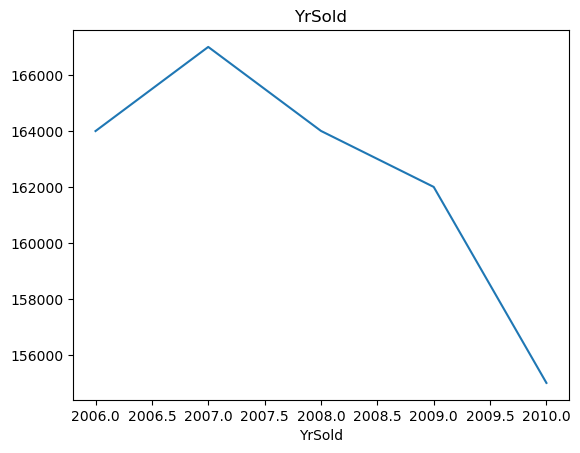

In [17]:
# Grouping & plotting the 'YrSold' feature with 'SalePrice' feature to check the relationship between them.
# Interestingly, if you see the plot, the price of houses is low as the year grows or in recent years.
df.groupby('YrSold')['SalePrice'].median().plot()
plt.title(feature)
plt.show()

In [18]:
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

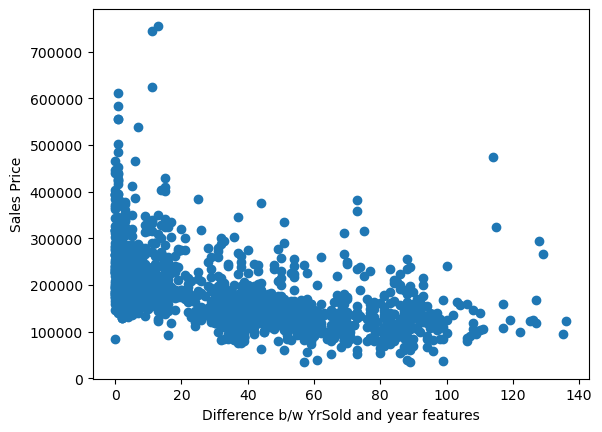

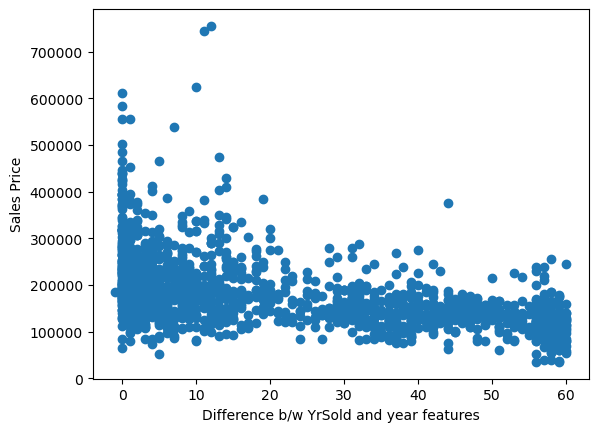

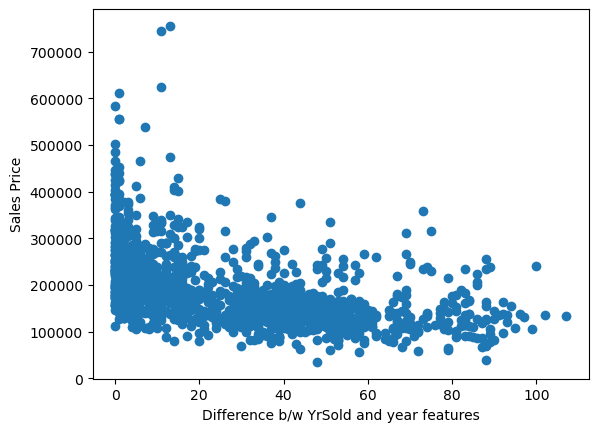

In [19]:
# Here we will compare the difference between all the year feature and YrSold vs SalePrice
for feature in year_feature:
    if feature != 'YrSold':
        data = df.copy()
        # Here we will find difference between all the year feature and the year the house was sold
        data[feature] = data['YrSold'] - data[feature]
        plt.scatter(data[feature], data['SalePrice'])
        plt.xlabel('Difference b/w YrSold and year features')
        plt.ylabel('Sales Price')
        plt.show()

In [20]:
# Numerical variables are of 2 types
# 1.Discrete variable
# 2.Continous variable
# Let's define discrete variable as all numerical variable feature unique values less than 25.
discrete_variable = [feature for feature in numerical_variables if len(df[feature].unique()) < 25 and feature not in year_feature]
discrete_variable

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [21]:
df[discrete_variable].head()

MSSubClass  OverallQual  OverallCond  LowQualFinSF  BsmtFullBath  \
0          60            7            5             0             1   
1          20            6            8             0             0   
2          60            7            5             0             1   
3          70            7            5             0             1   
4          60            8            5             0             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0             0         2         1             3             1             8   
1             1         2         0             3             1             6   
2             0         2         1             3             1             6   
3             0         1         0             3             1             7   
4             0         2         1             4             1             9   

   Fireplaces  GarageCars  3SsnPorch  PoolArea  MiscVal  MoSold  
0           0           2          0         0        0       2  
1           1           2          0         0        0       5  
2           1           2          0         0        0       9  
3           1           3          0         0        0       2  
4           1           3          0         0        0      12

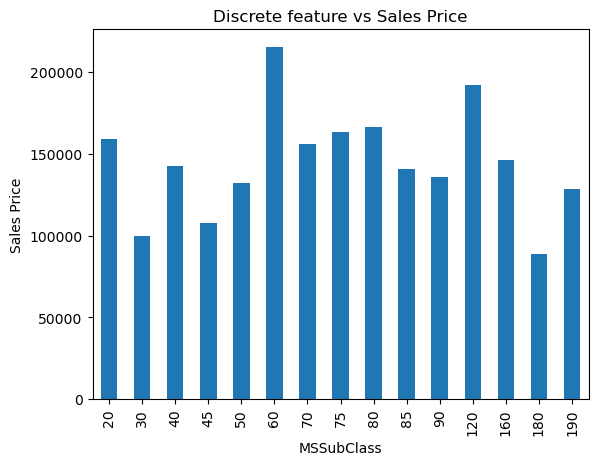

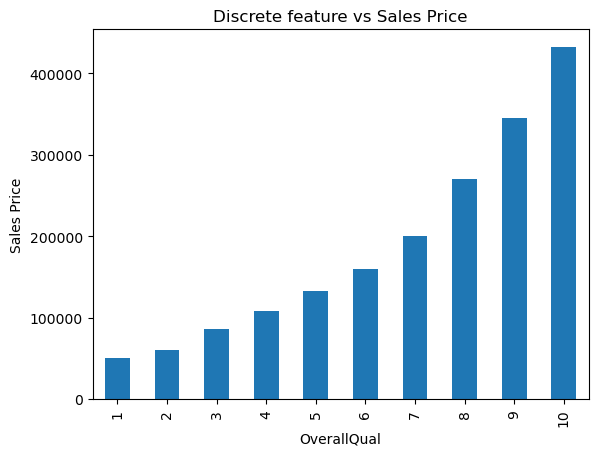

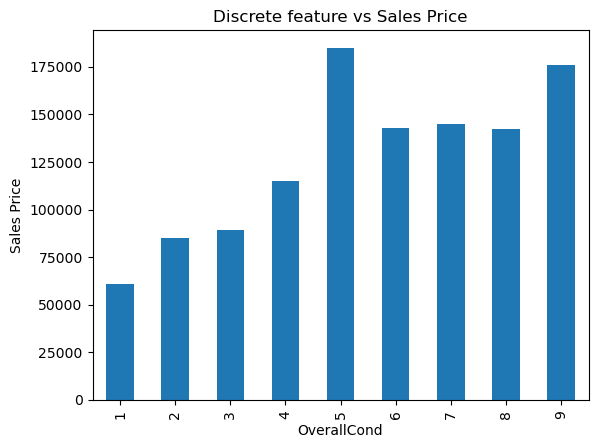

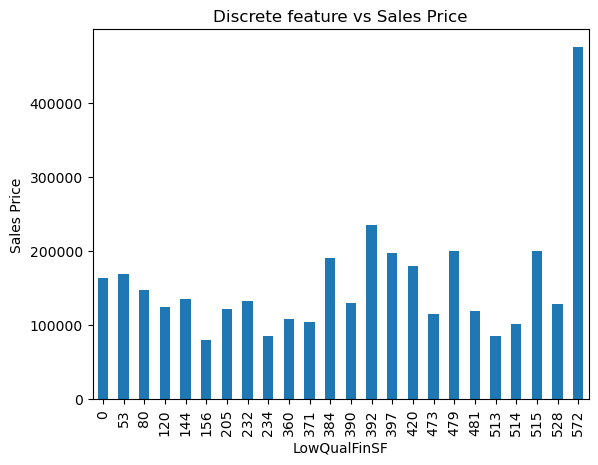

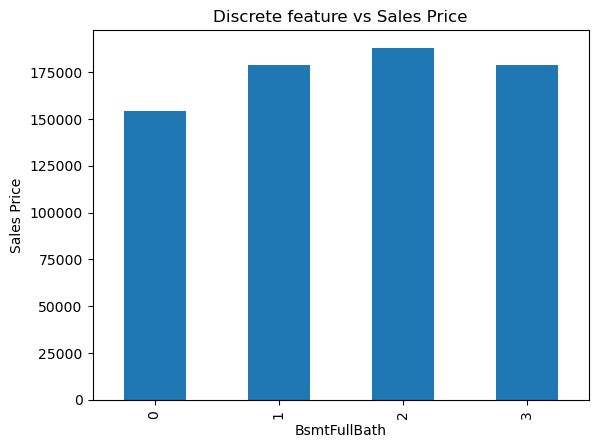

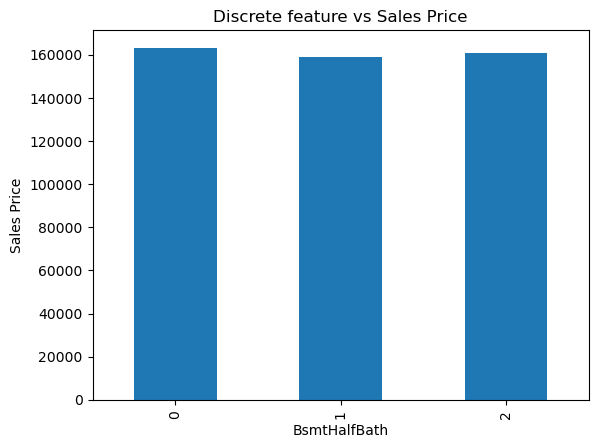

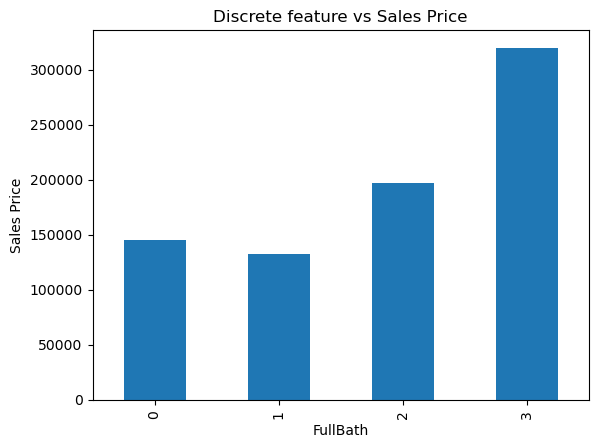

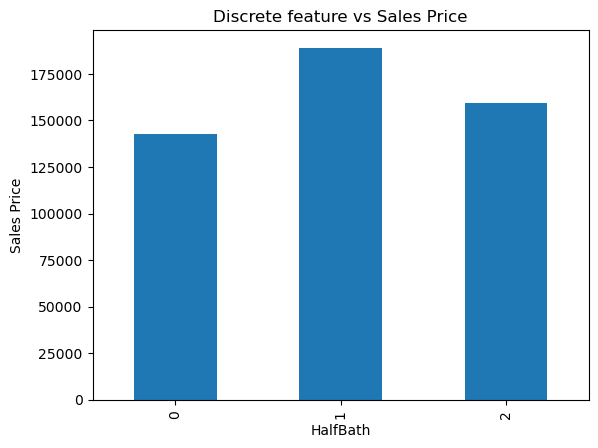

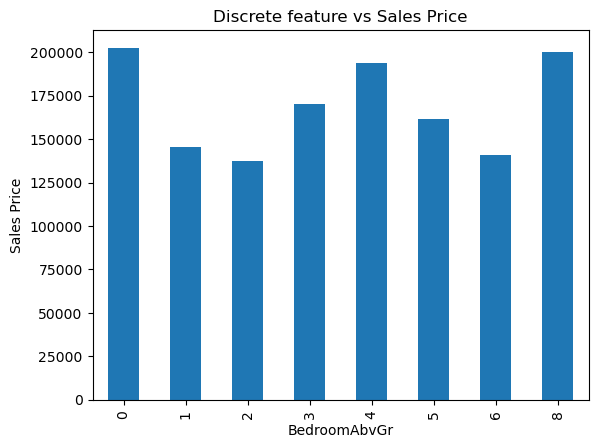

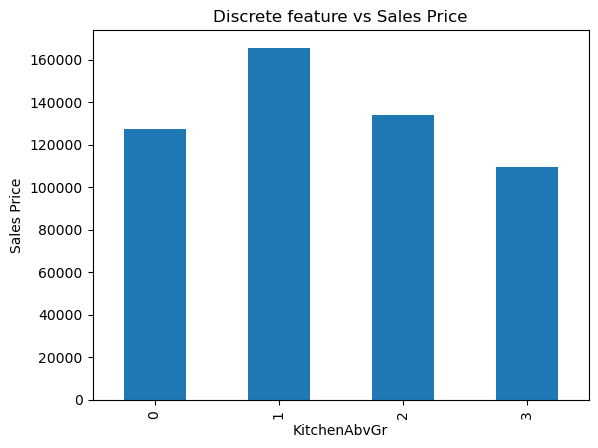

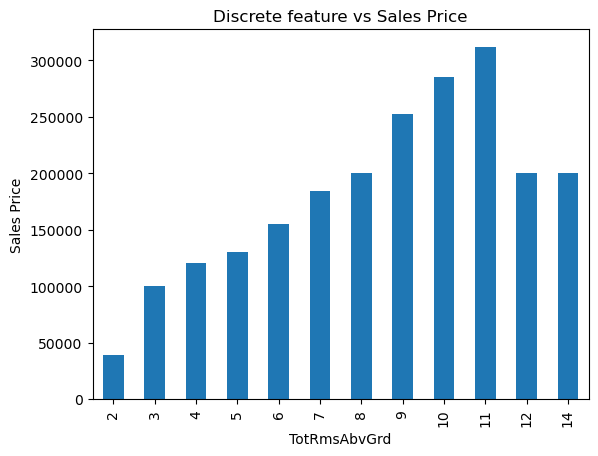

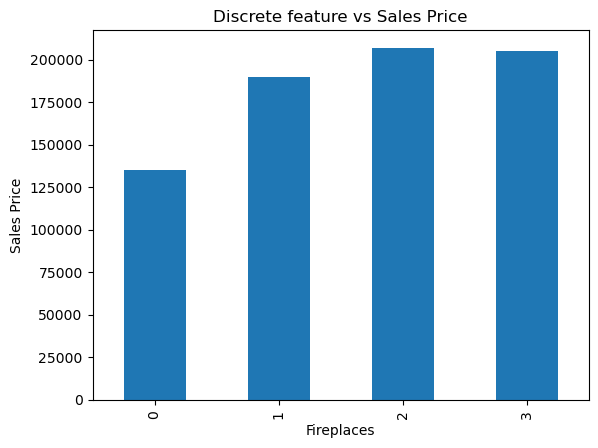

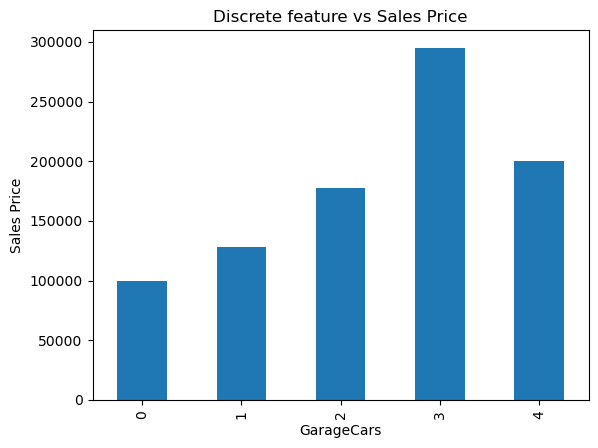

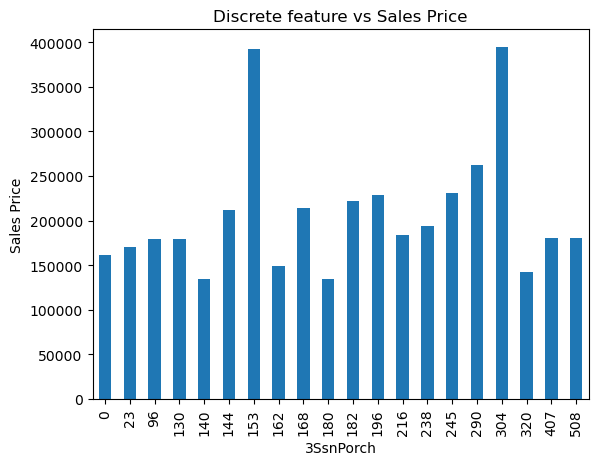

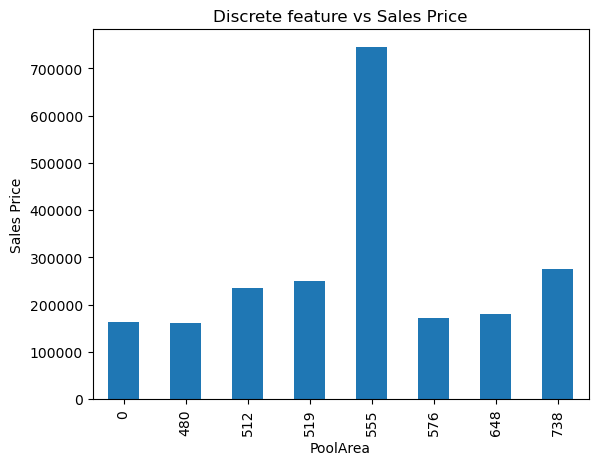

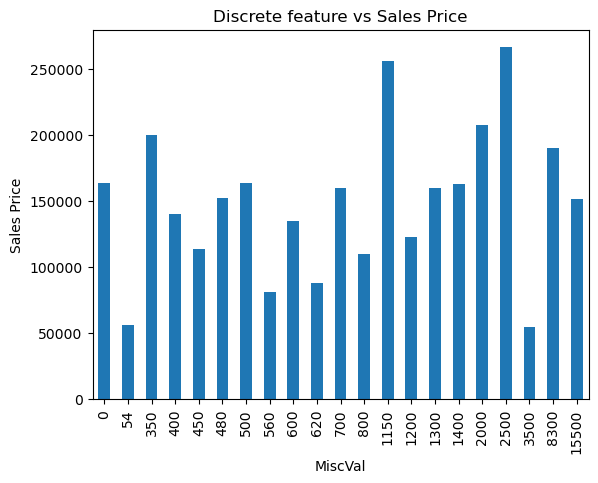

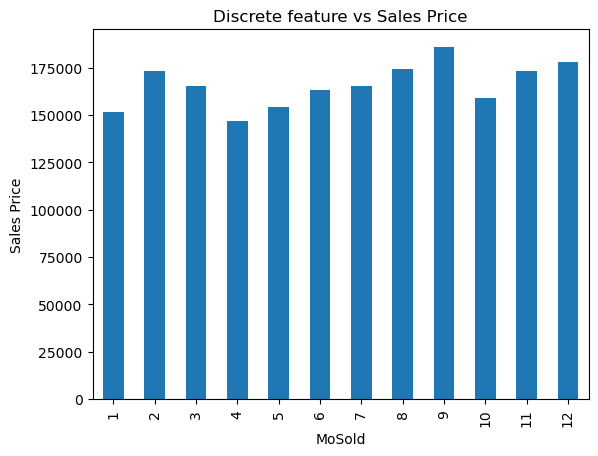

In [22]:
# Let's see the relationship between the Sales Price of a house and the discrete variable features.
for feature in discrete_variable:
    df.groupby(feature)['SalePrice'].median().plot(kind='bar')
    plt.title('Discrete feature vs Sales Price')
    plt.xlabel(feature)
    plt.ylabel('Sales Price')
    plt.show()

In [23]:
# Let's list all the continous varibles (not in discrete variable feature, year variable feature)
continous_feature = [feature for feature in numerical_variables if feature not in discrete_variable + year_feature + ['Id']]
df[continous_feature].head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         65.0     8450       196.0         706           0        150   
1         80.0     9600         0.0         978           0        284   
2         68.0    11250       162.0         486           0        434   
3         60.0     9550         0.0         216           0        540   
4         84.0    14260       350.0         655           0        490   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  GarageArea  WoodDeckSF  \
0          856       856       854       1710         548           0   
1         1262      1262         0       1262         460         298   
2          920       920       866       1786         608           0   
3          756       961       756       1717         642           0   
4         1145      1145      1053       2198         836         192   

   OpenPorchSF  EnclosedPorch  ScreenPorch  SalePrice  
0           61              0            0     208500  
1            0              0            0     181500  
2           42              0            0     223500  
3           35            272            0     140000  
4           84              0            0     250000

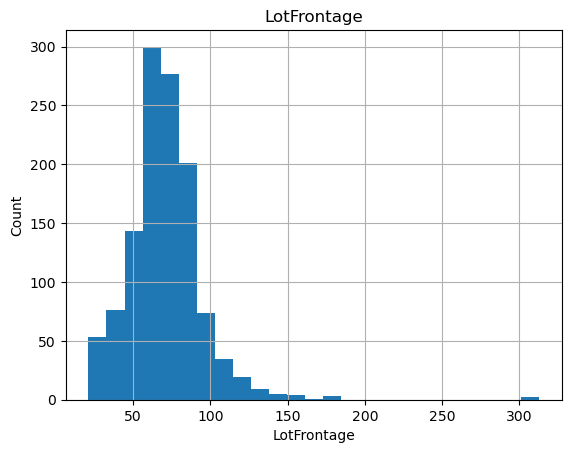

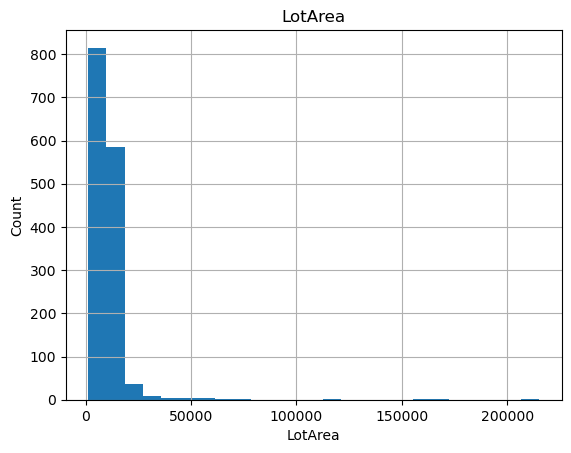

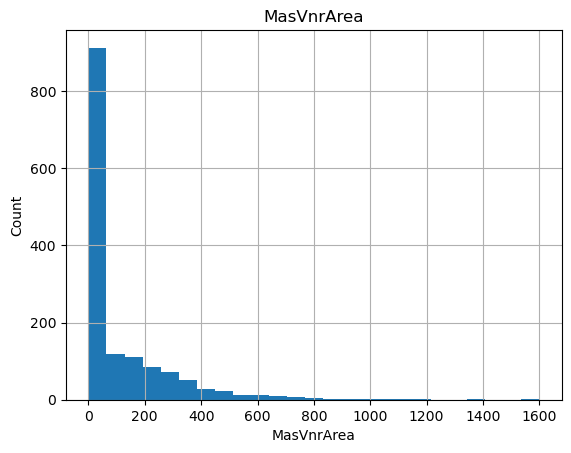

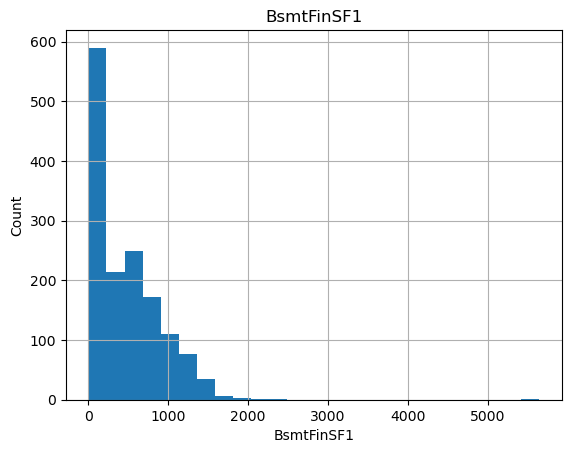

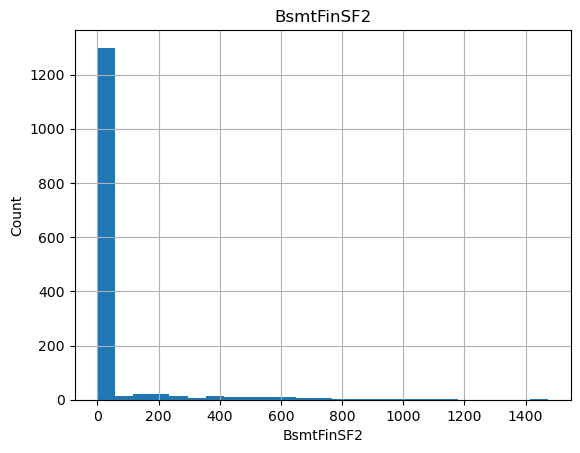

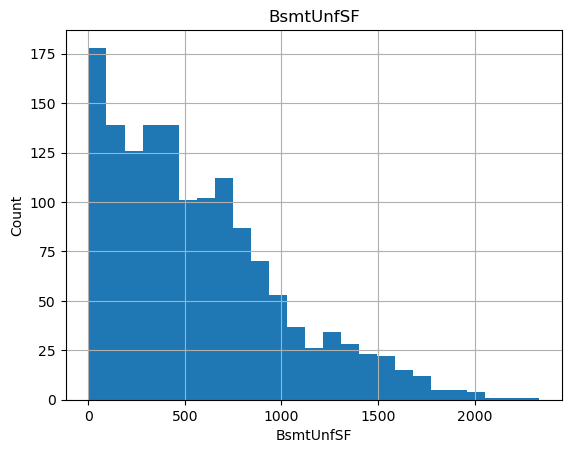

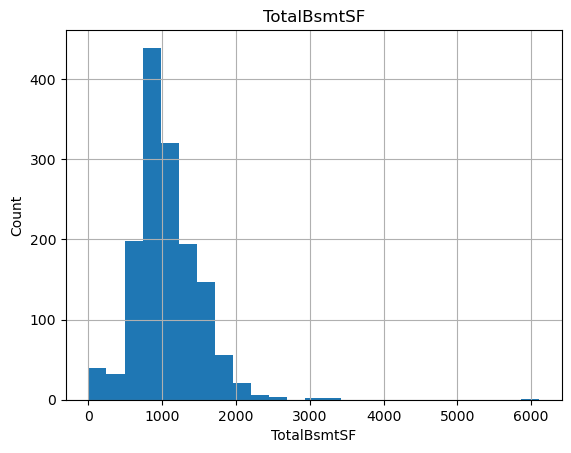

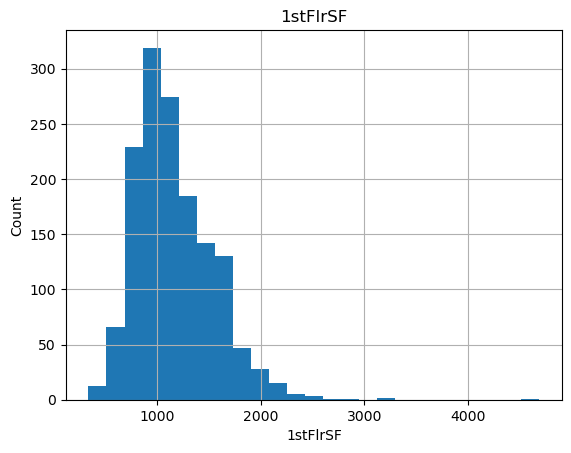

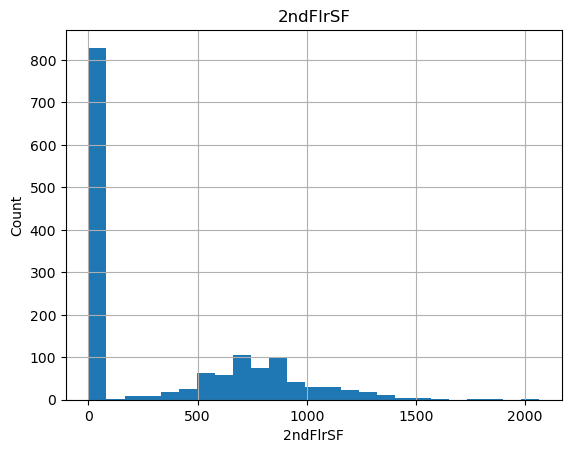

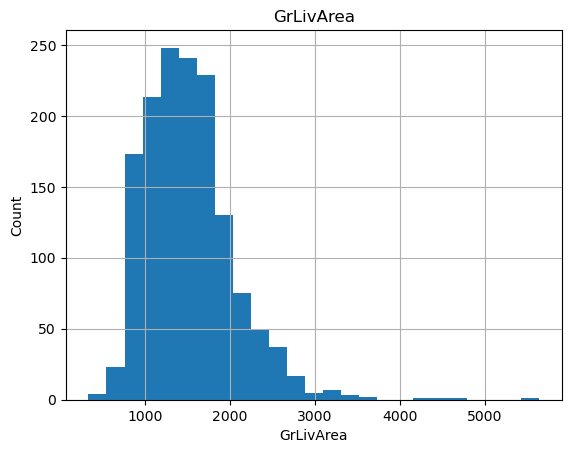

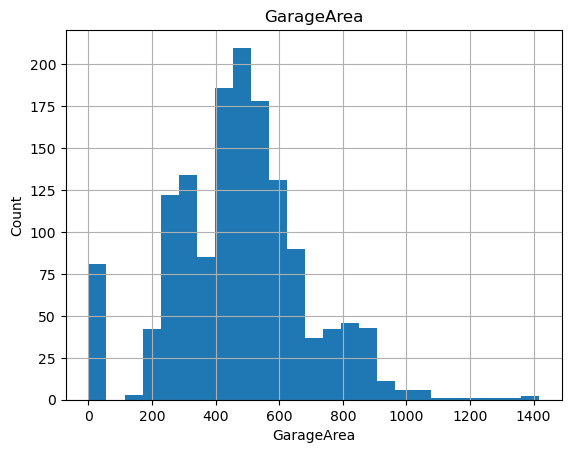

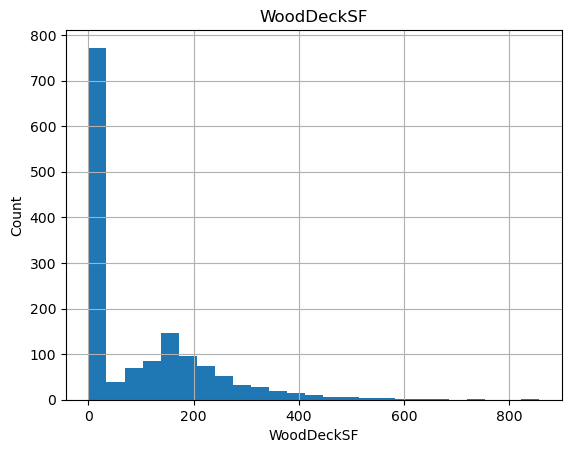

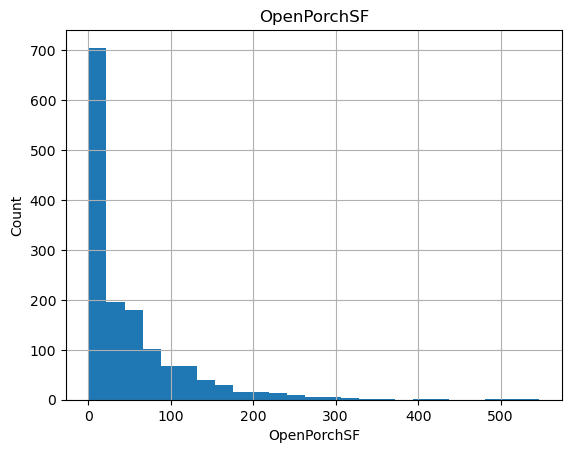

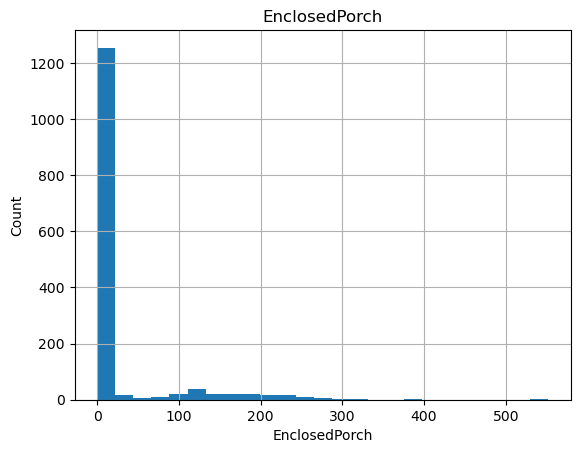

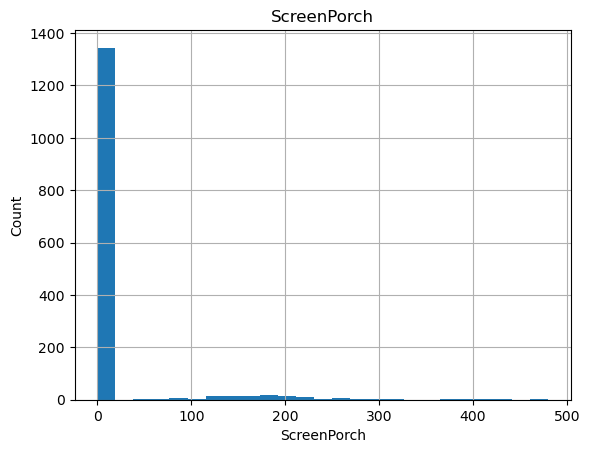

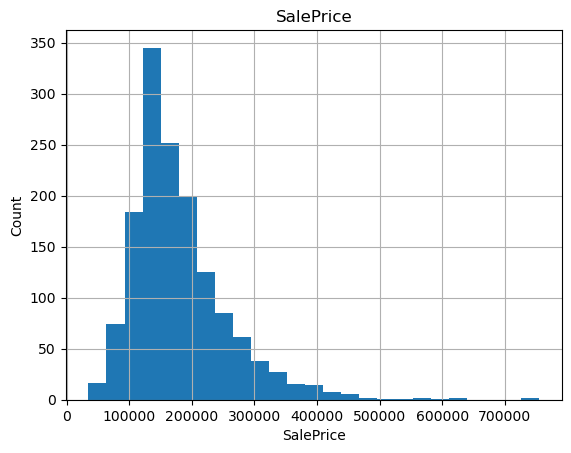

In [24]:
# Let's see the relationship between the continous feature and the Sales Price of a house using bar plot

for feature in continous_feature:
    data = df.copy()
    #df.groupby(feature)['SalePrice'].median().plot(kind='hist')
    data[feature].hist(bins=25)
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()
    

## Exploratory Data Analysis 2

## Log Normal Transformation of continous variables since it is skewed

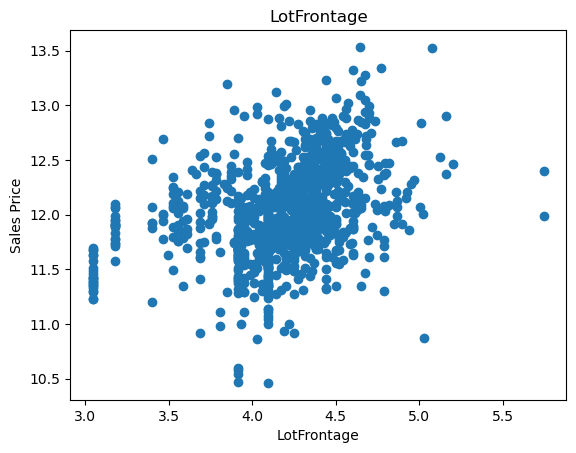

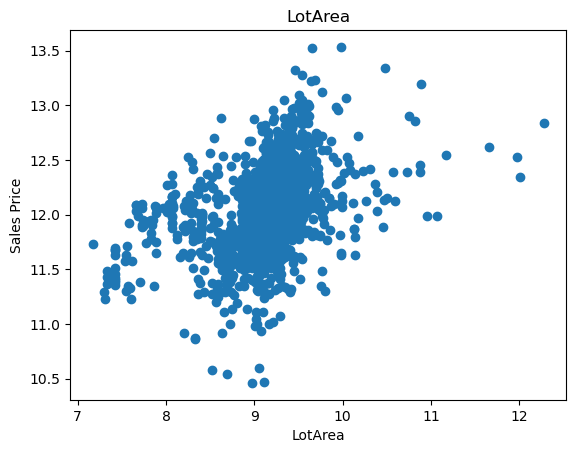

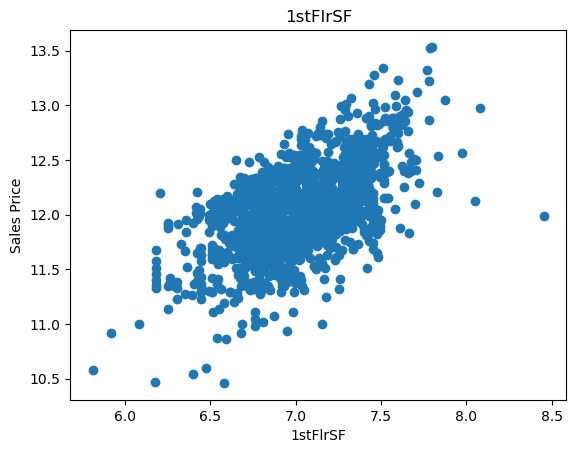

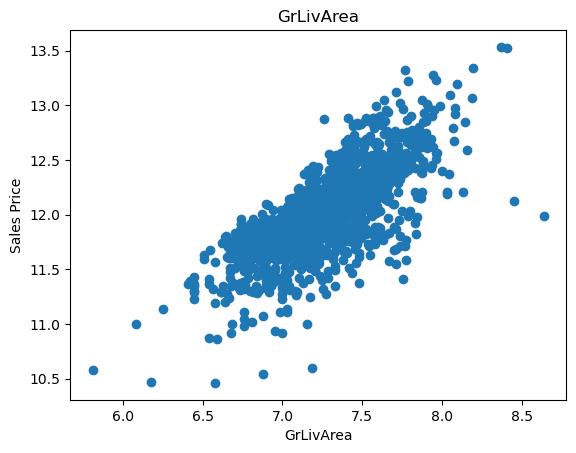

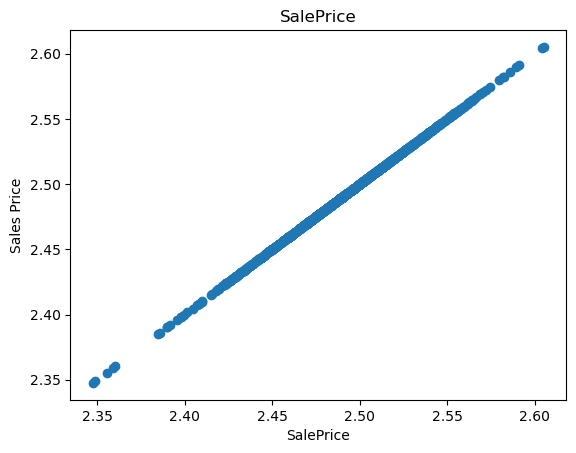

In [27]:
# Let's do the log normal transformation of continous features
for feature in continous_feature:
    data = df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data['SalePrice'] = np.log(data['SalePrice'])
        plt.scatter(data[feature], data['SalePrice'])
        plt.title(feature)
        plt.xlabel(feature)
        plt.ylabel('Sales Price')
        plt.show()

## Outliers

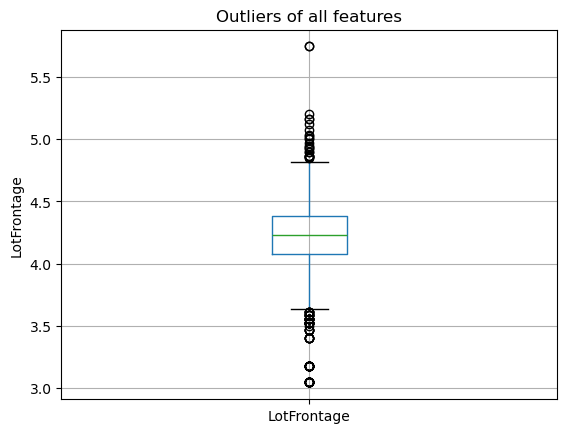

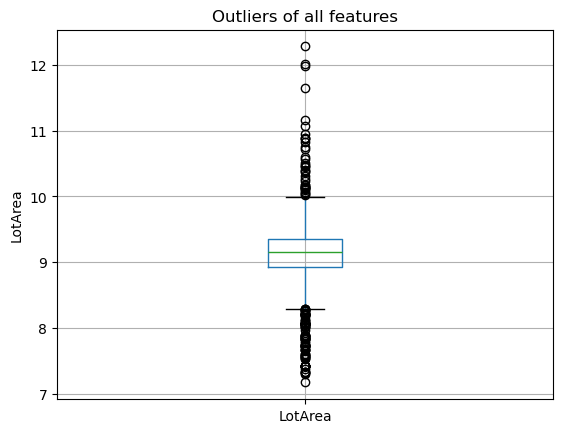

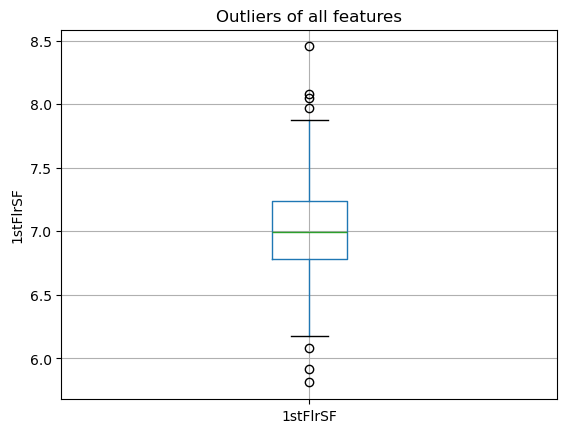

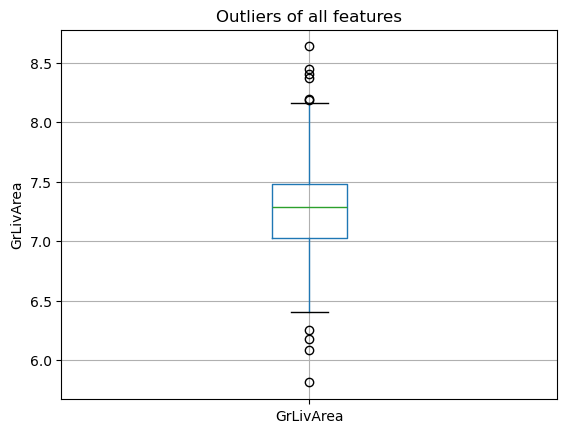

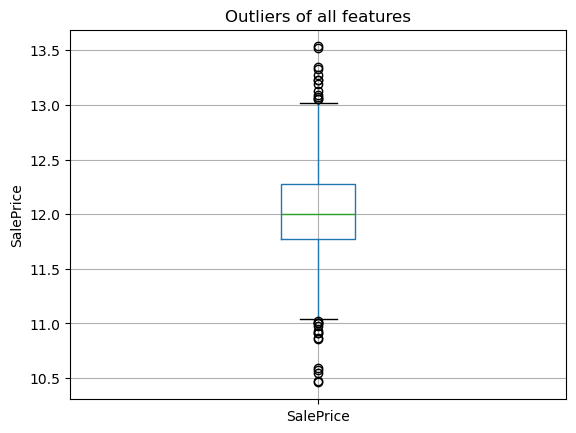

In [29]:
# Let's find the outliers of continous feature using box plot. 
# Box plots are usually used for finding the outliers. The bottom line of box refers to 0
for feature in continous_feature:
    data = df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        #sns.boxplot(x=data[feature],palette='rainbow')
        data.boxplot(column=feature)
        plt.title('Outliers of all features')
        plt.ylabel(feature)
        plt.show()

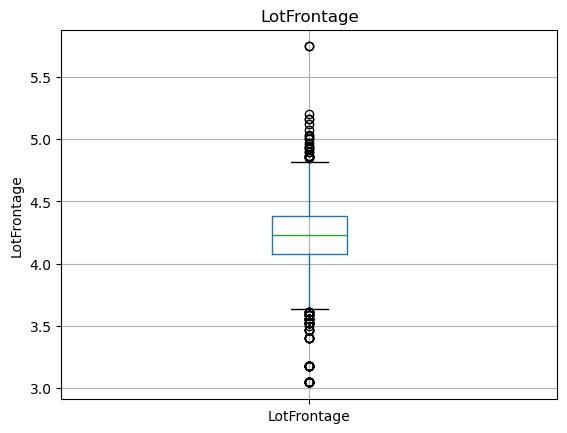

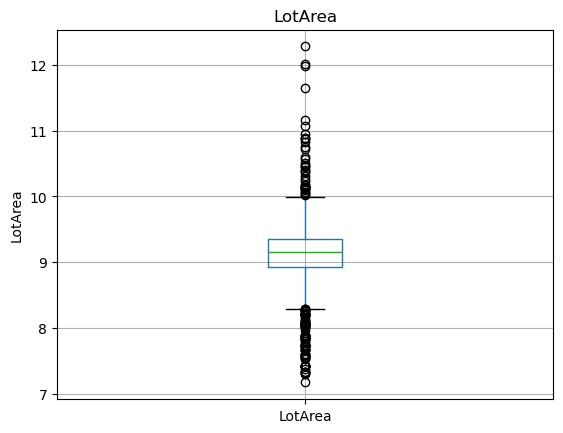

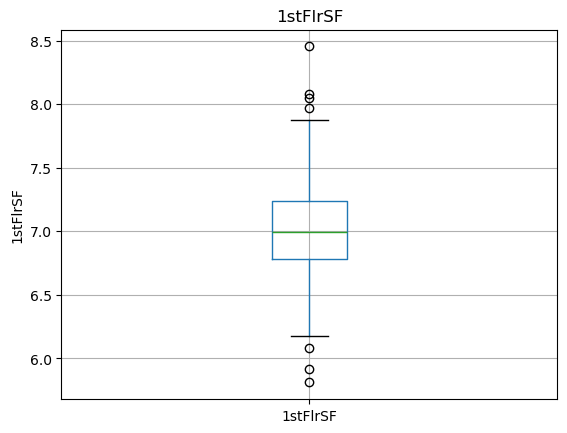

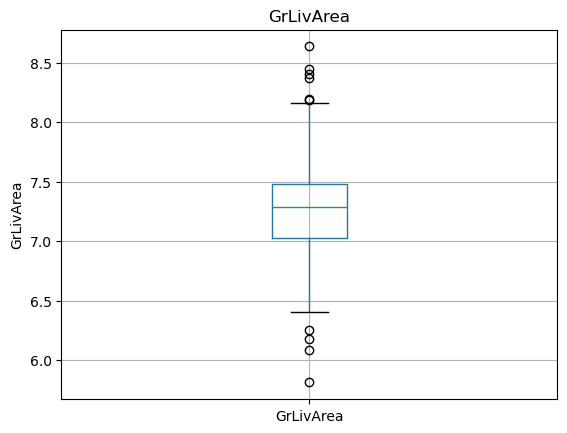

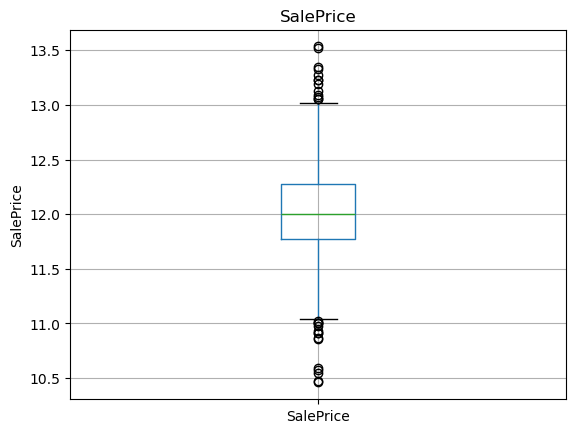

In [55]:
for feature in continous_feature:
    data = df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

## Categorical Variables

In [60]:
categorical_feature = [feature for feature in df.columns if df[feature].dtypes == 'O']
df[categorical_feature].head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd        NaN        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng        NaN        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          GLQ          Unf    GasA        Ex   
1       TA           Gd          ALQ          Unf    GasA        Ex   
2       TA           Mn          GLQ          Unf    GasA        Ex   
3       Gd           No          ALQ          Unf    GasA        Gd   
4       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional FireplaceQu GarageType  \
0          Y      SBrkr          Gd        Typ         NaN     Attchd   
1          Y      SBrkr          TA        Typ          TA     Attchd   
2          Y      SBrkr          Gd        Typ          TA     Attchd   
3          Y      SBrkr          Gd        Typ          Gd     Detchd   
4          Y      SBrkr          Gd        Typ          TA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature  \
0          RFn         TA         TA          Y    NaN   NaN         NaN   
1          RFn         TA         TA          Y    NaN   NaN         NaN   
2          RFn         TA         TA          Y    NaN   NaN         NaN   
3          Unf         TA         TA          Y    NaN   NaN         NaN   
4          RFn         TA         TA          Y    NaN   NaN         NaN   

  SaleType SaleCondition  
0       WD        Normal  
1       WD        Normal  
2       WD        Normal  
3       WD       Abnorml  
4       WD        Normal

## No.of categories in each categorical feature

In [107]:
for feature in categorical_feature:
    print(f'The no. of categories in {feature} is {len(df[feature].unique())}')

The no. of categories in MSZoning is 5
The no. of categories in Street is 2
The no. of categories in Alley is 3
The no. of categories in LotShape is 4
The no. of categories in LandContour is 4
The no. of categories in Utilities is 2
The no. of categories in LotConfig is 5
The no. of categories in LandSlope is 3
The no. of categories in Neighborhood is 25
The no. of categories in Condition1 is 9
The no. of categories in Condition2 is 8
The no. of categories in BldgType is 5
The no. of categories in HouseStyle is 8
The no. of categories in RoofStyle is 6
The no. of categories in RoofMatl is 8
The no. of categories in Exterior1st is 15
The no. of categories in Exterior2nd is 16
The no. of categories in MasVnrType is 4
The no. of categories in ExterQual is 4
The no. of categories in ExterCond is 5
The no. of categories in Foundation is 6
The no. of categories in BsmtQual is 5
The no. of categories in BsmtCond is 5
The no. of categories in BsmtExposure is 5
The no. of categories in BsmtFinT

## Relationship between categorical variables & SalesPrice

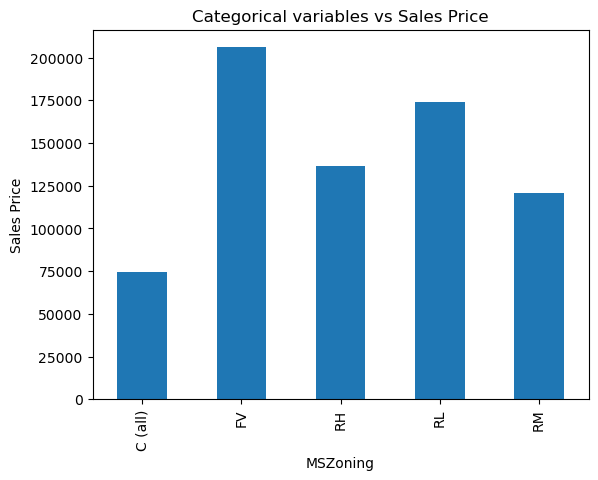

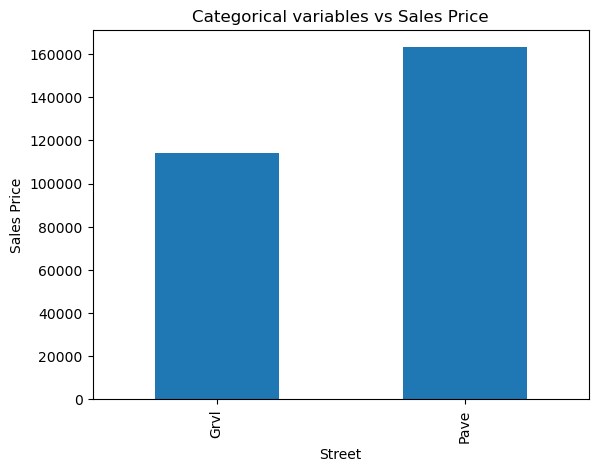

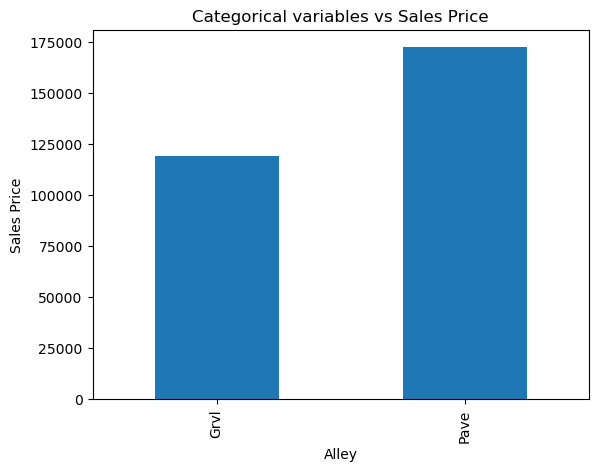

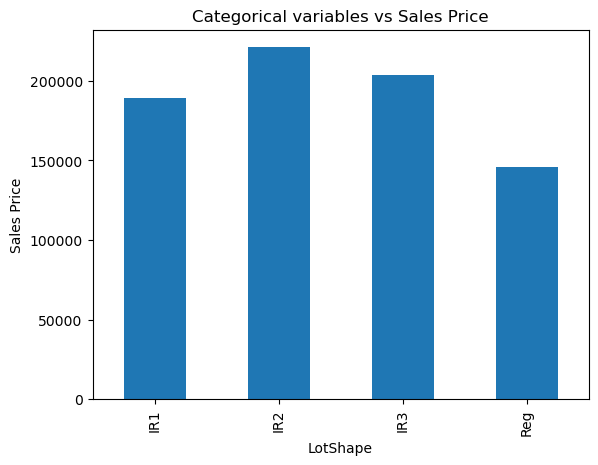

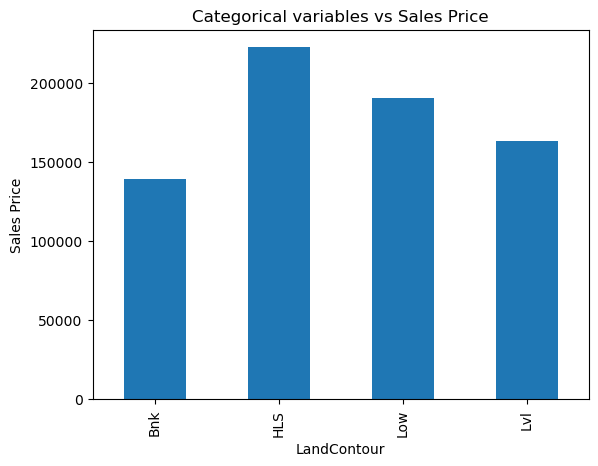

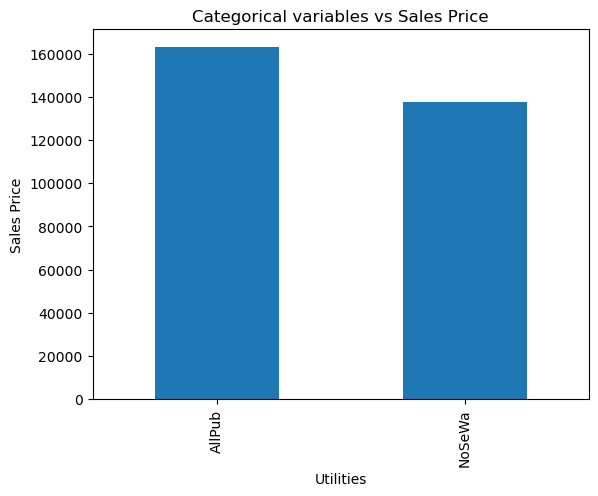

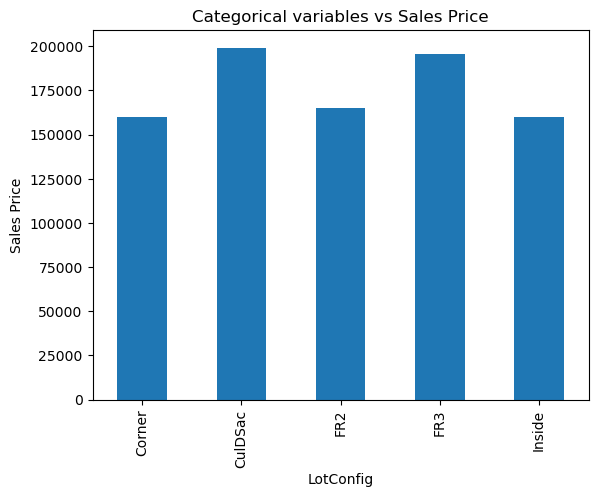

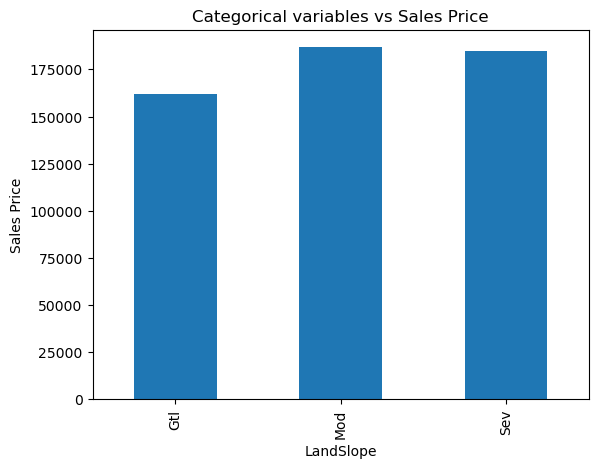

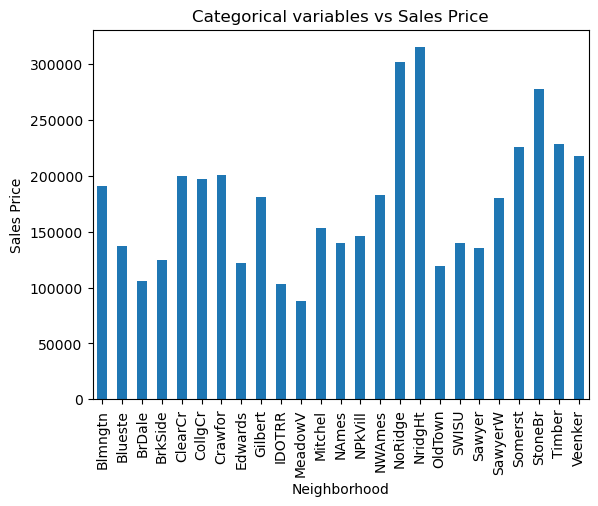

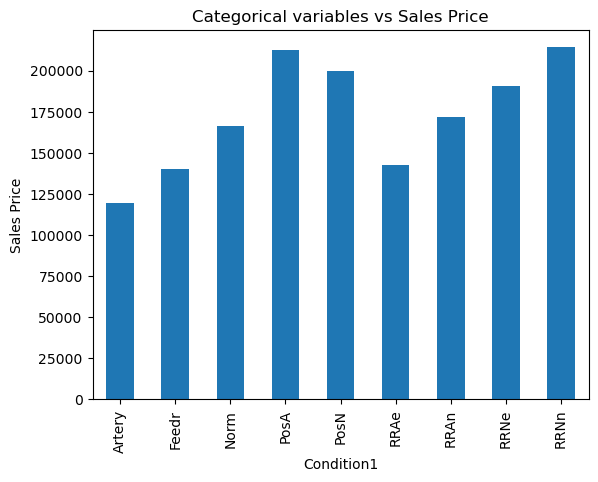

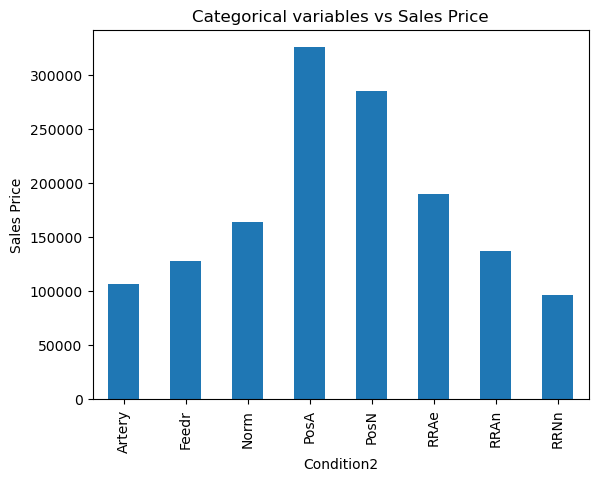

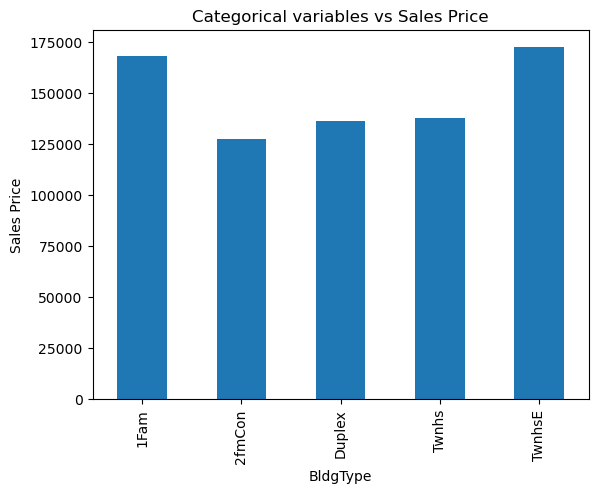

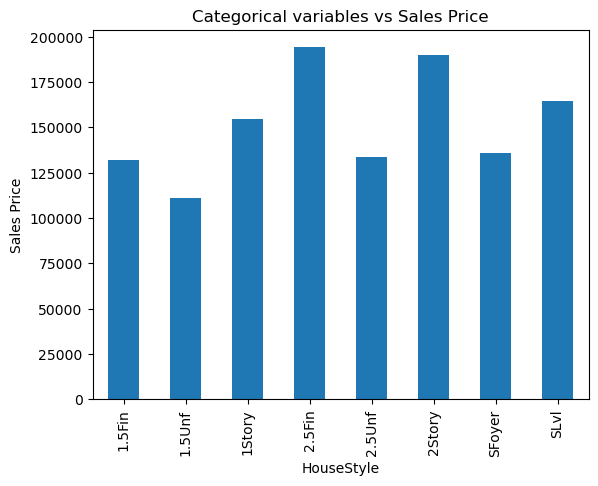

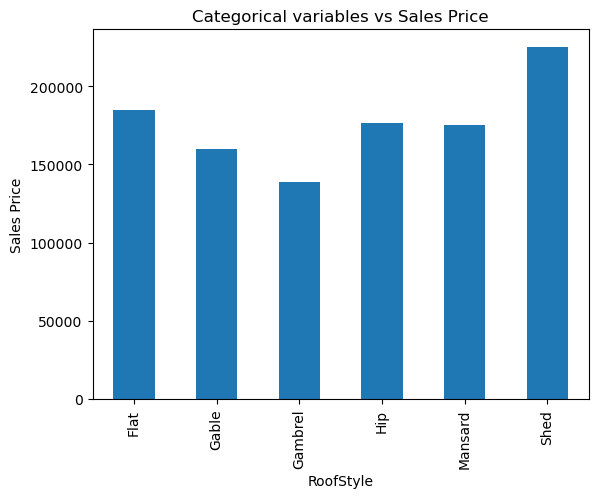

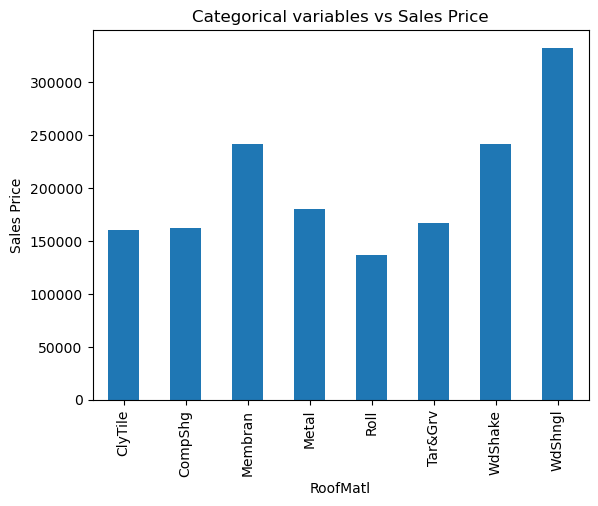

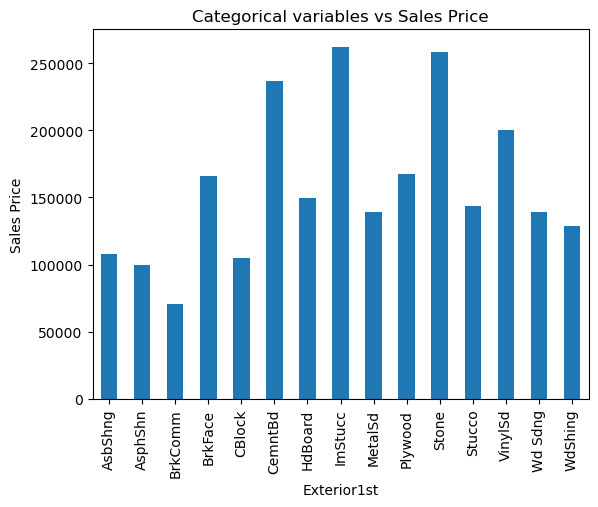

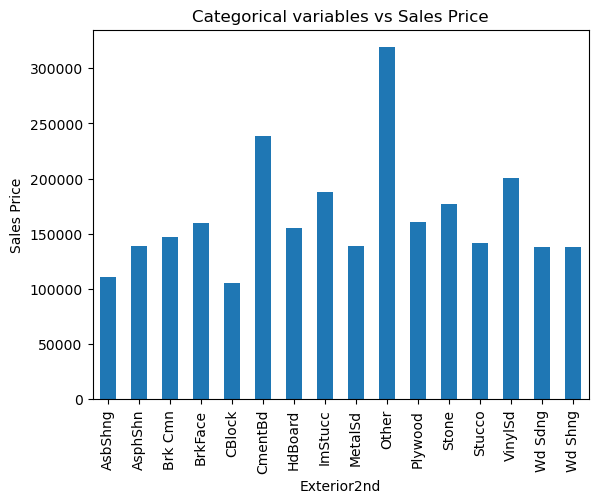

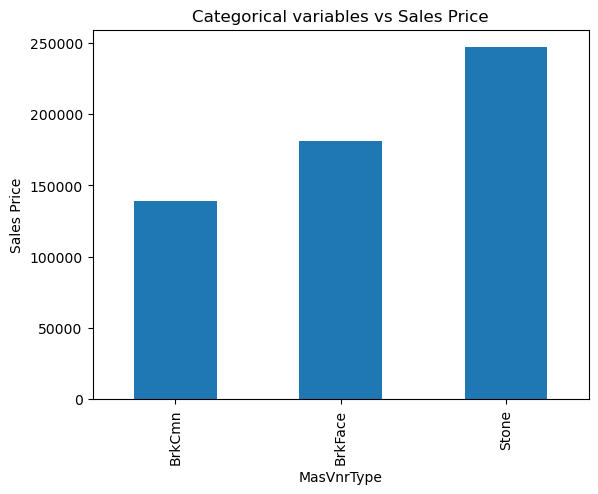

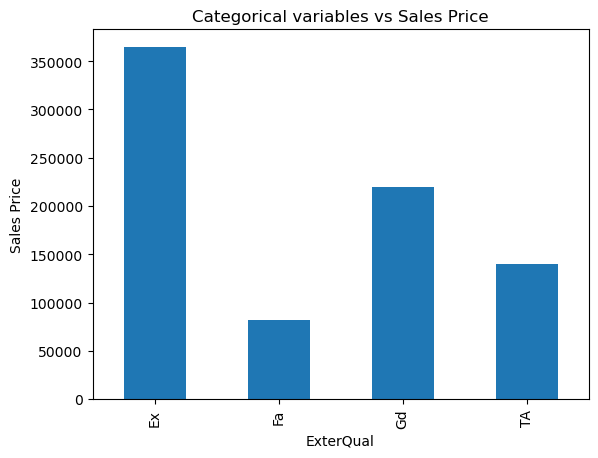

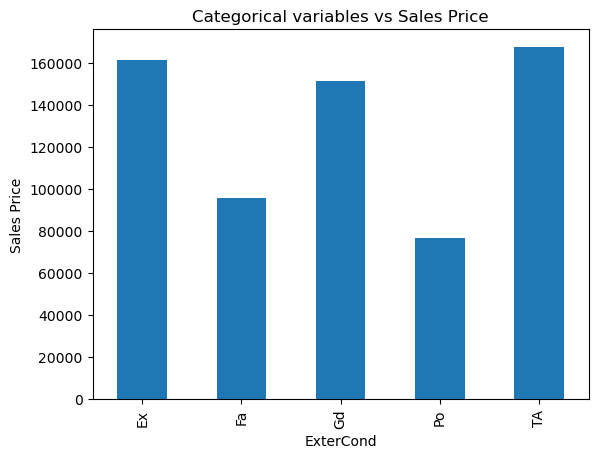

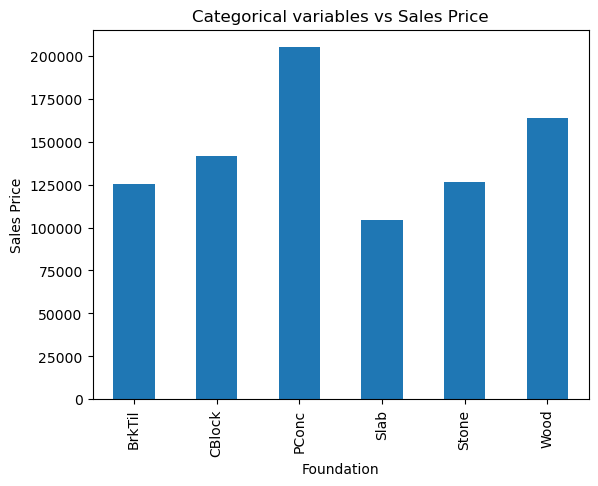

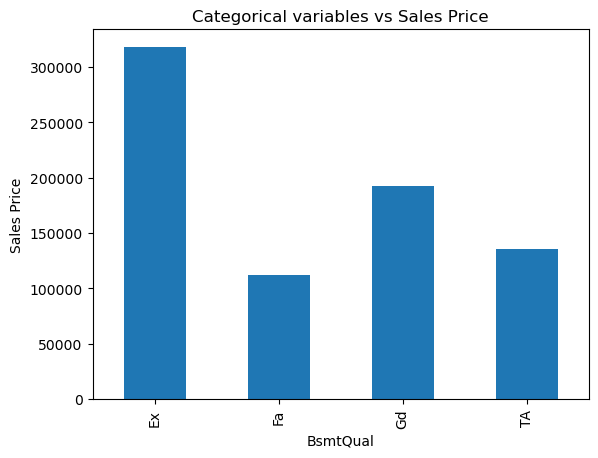

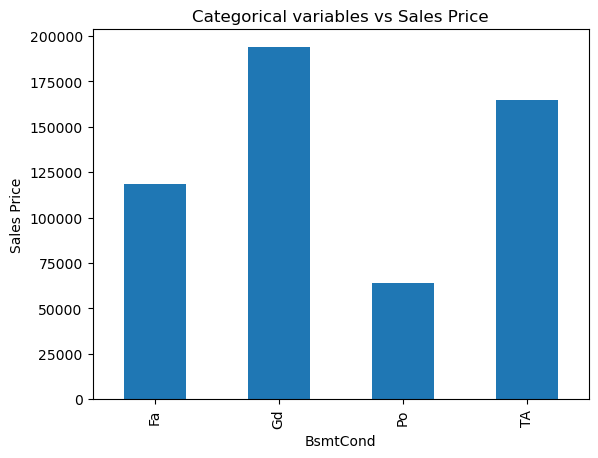

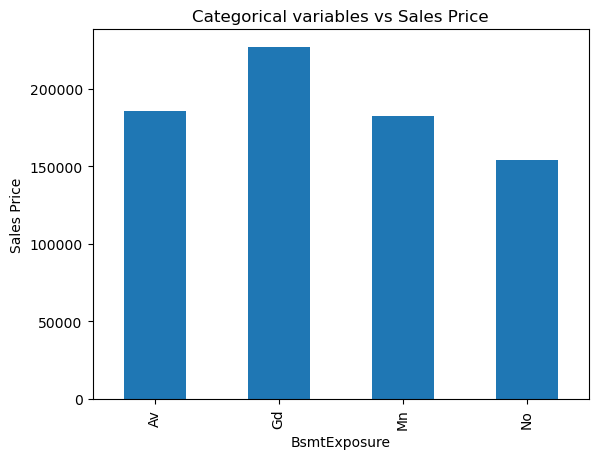

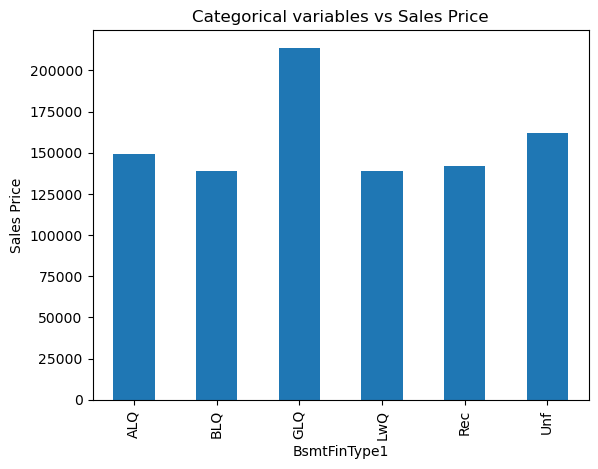

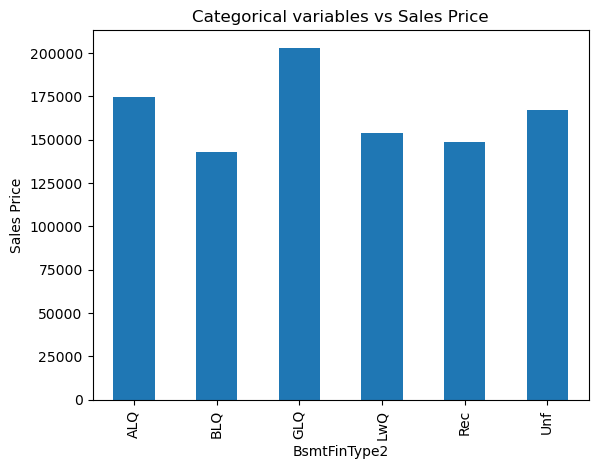

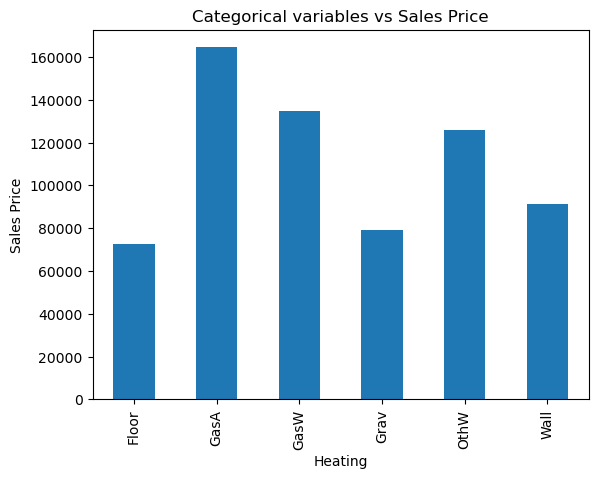

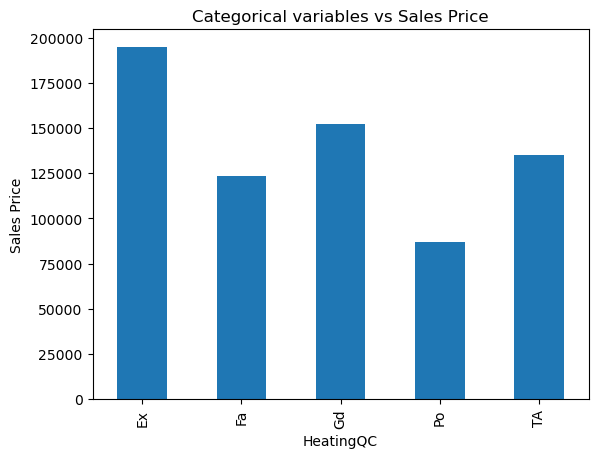

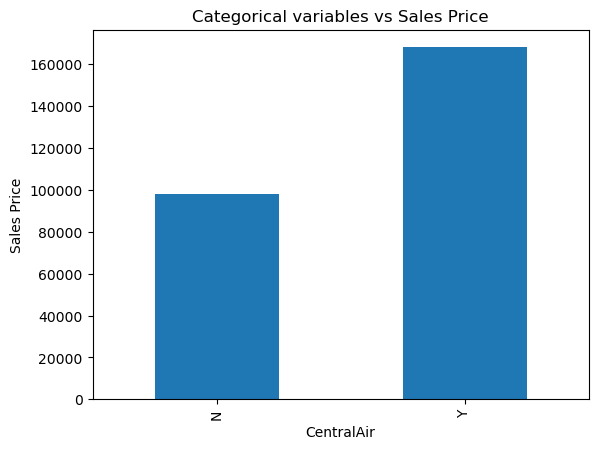

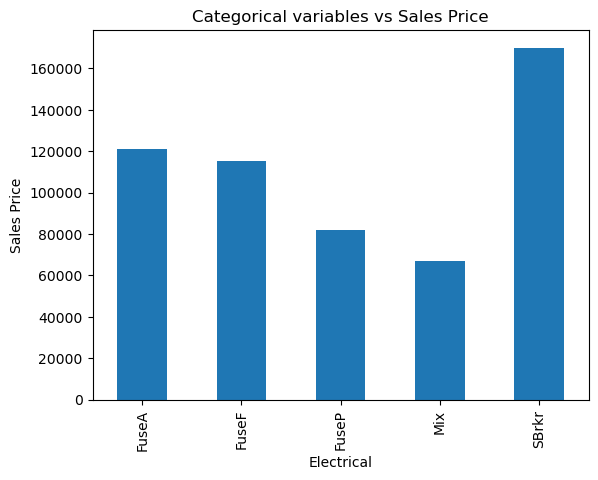

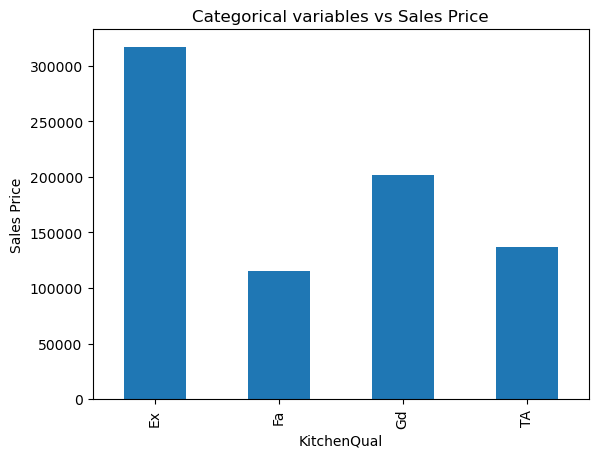

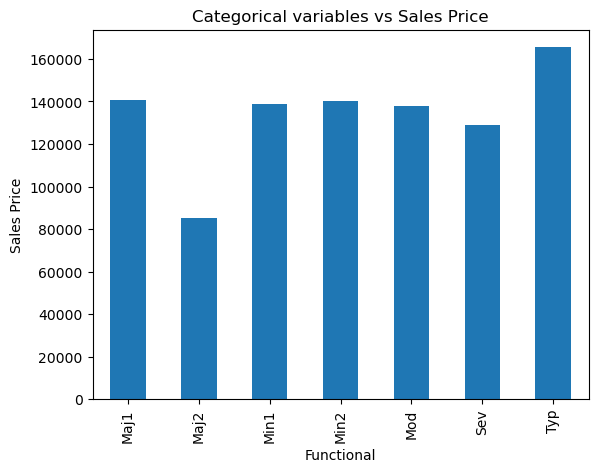

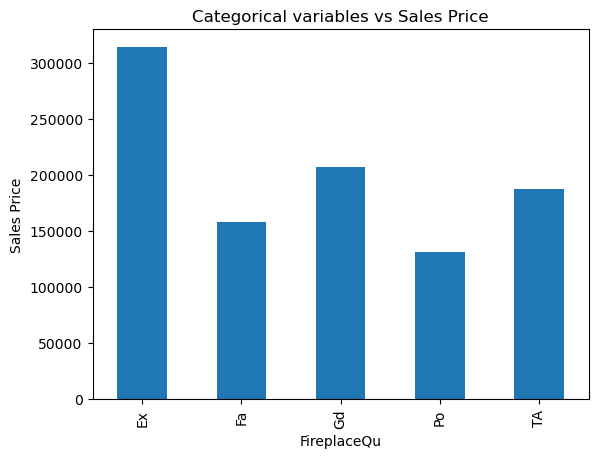

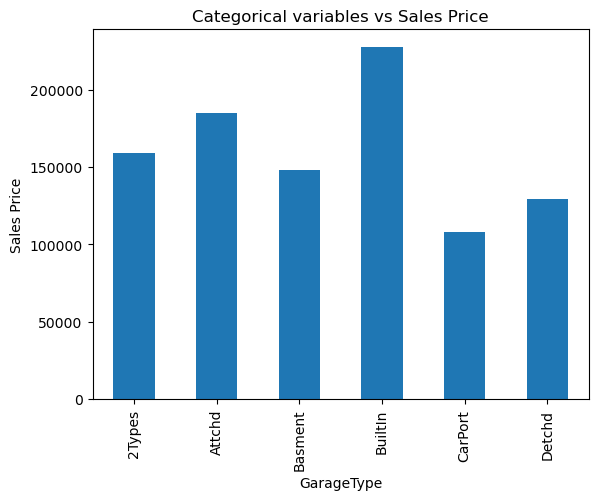

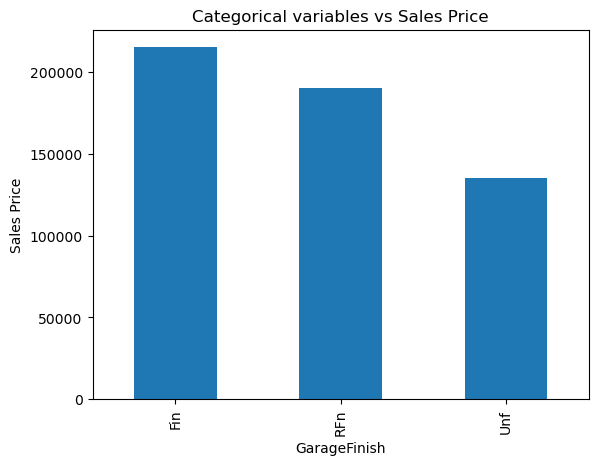

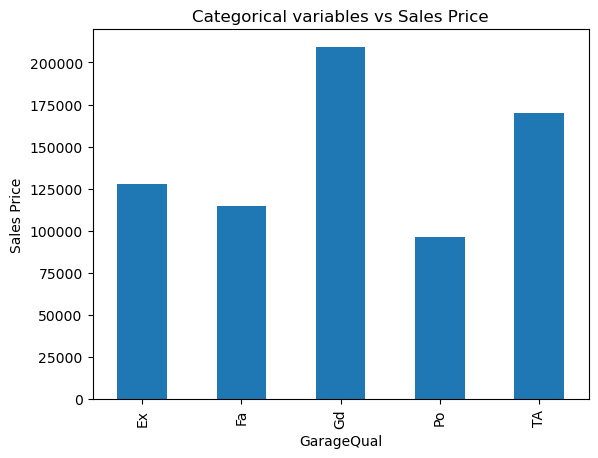

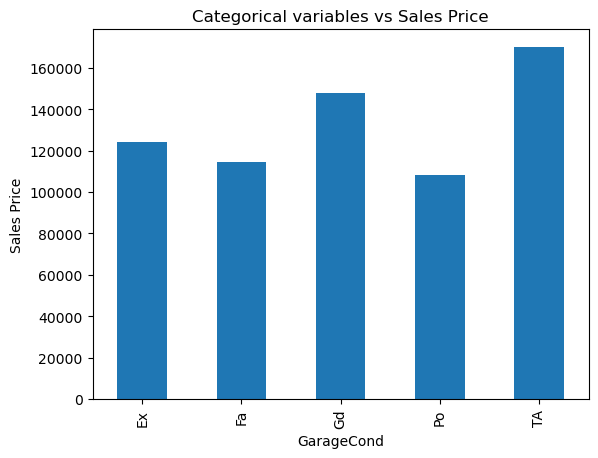

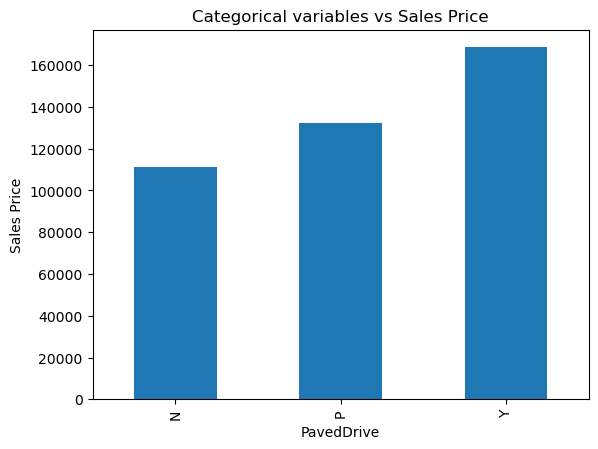

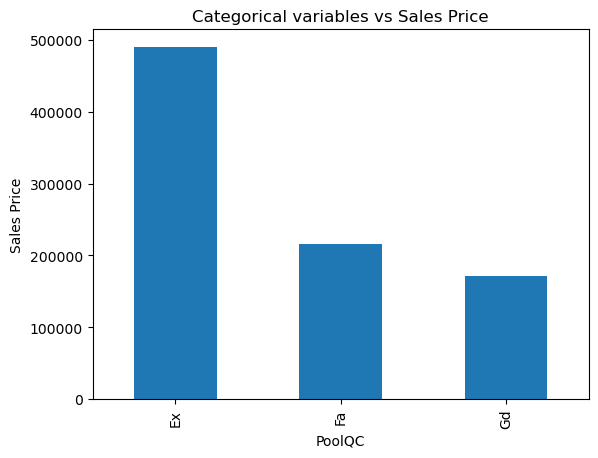

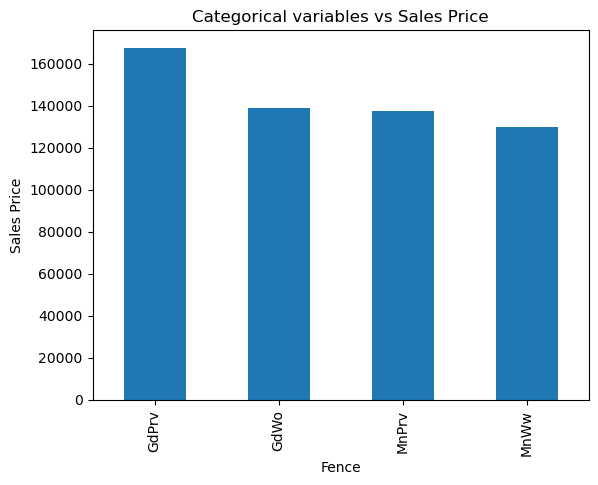

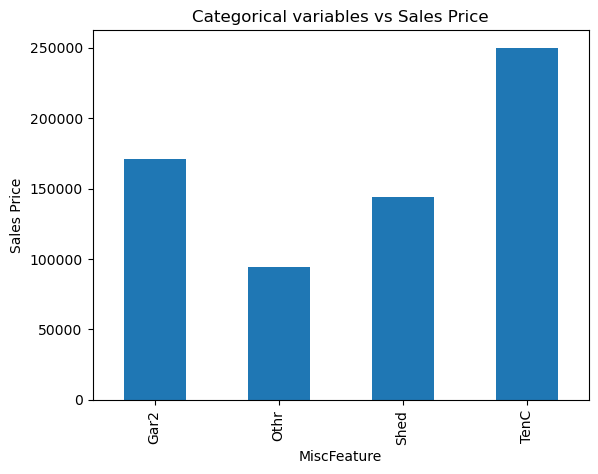

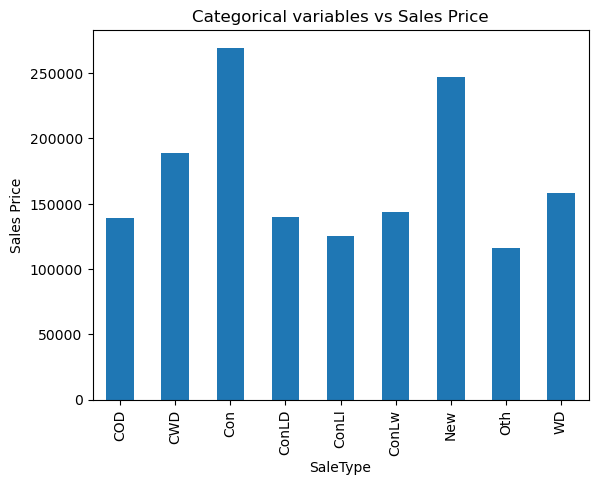

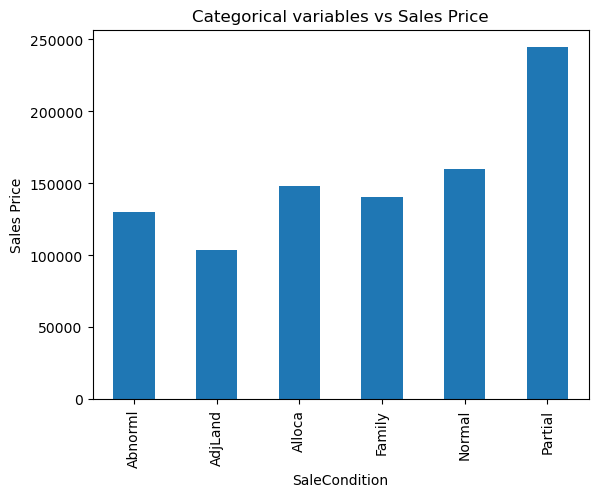

In [63]:
for feature in categorical_feature:
    data = df.copy()
    data.groupby(feature)['SalePrice'].median().plot(kind='bar')
    plt.title('Categorical variables vs Sales Price')
    plt.xlabel(feature)
    plt.ylabel('Sales Price')
    plt.show()